In [1]:
!pip install pmdarima

In [2]:
!pip install category_encoders

In [3]:


#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

##data visualizations
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##stat models
from statsmodels.tsa.stattools import adfuller  ##for adf test
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests##grenger causality test


##Error evaluations
from sklearn.metrics import mean_squared_error, mean_squared_log_error,mean_squared_log_error
from scipy.stats import boxcox

## Algorithms
from pmdarima import auto_arima
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Feature processing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

## for saving model
import joblib

In [4]:
holidays_events=pd.read_csv("/content/holidays_events.csv", parse_dates =['date'])
oil=pd.read_csv("/content/oil.csv", parse_dates =['date'])
sample=pd.read_csv("/content/sample_submission.csv")
stores=pd.read_csv("/content/stores.csv")
test=pd.read_csv("/content/test.csv", parse_dates =['date'])
train=pd.read_csv("/content/train.csv", parse_dates =['date'])
trans=pd.read_csv("/content/transactions.csv", parse_dates =['date'])

In [5]:
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [6]:
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [7]:
trans.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [8]:
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [9]:
holidays_events.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [10]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [12]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [13]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [14]:
trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [15]:
trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [16]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [17]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [18]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [19]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [21]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

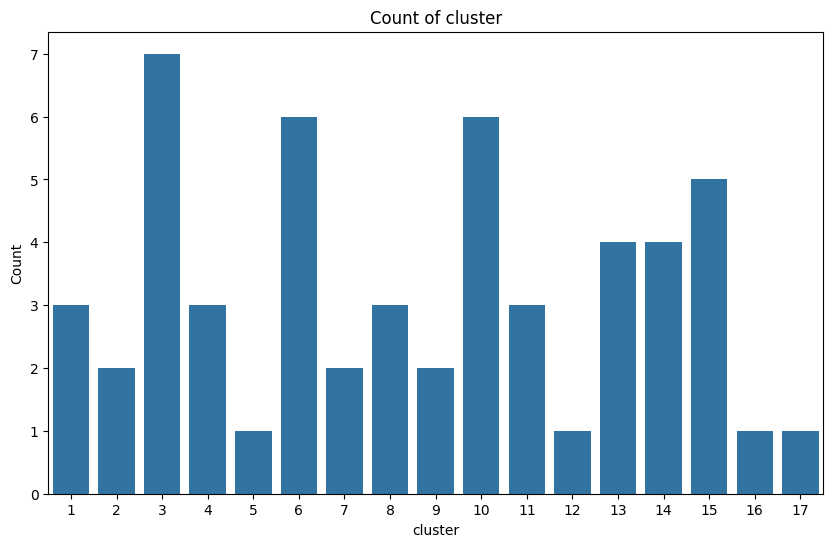

In [22]:
#exploring cluster column
plt.figure(figsize=(10, 6))
sns.countplot(data=stores, x="cluster")
plt.title(f'Count of {"cluster"}')
plt.xlabel("cluster")
plt.ylabel('Count')
plt.show()

In [23]:
stores.state.value_counts()

state
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: count, dtype: int64

<ipython-input-24-e63b2ac4f15e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')


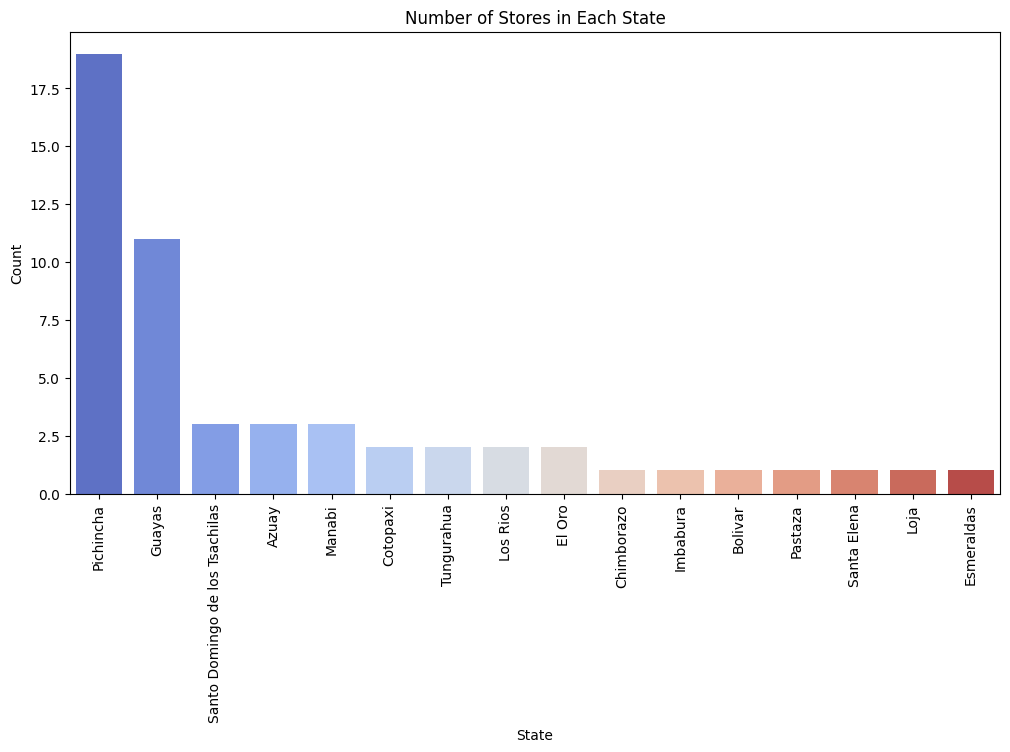

In [24]:
state_counts = stores['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
plt.title('Number of Stores in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-25-7b1b52db45df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='Dark2')


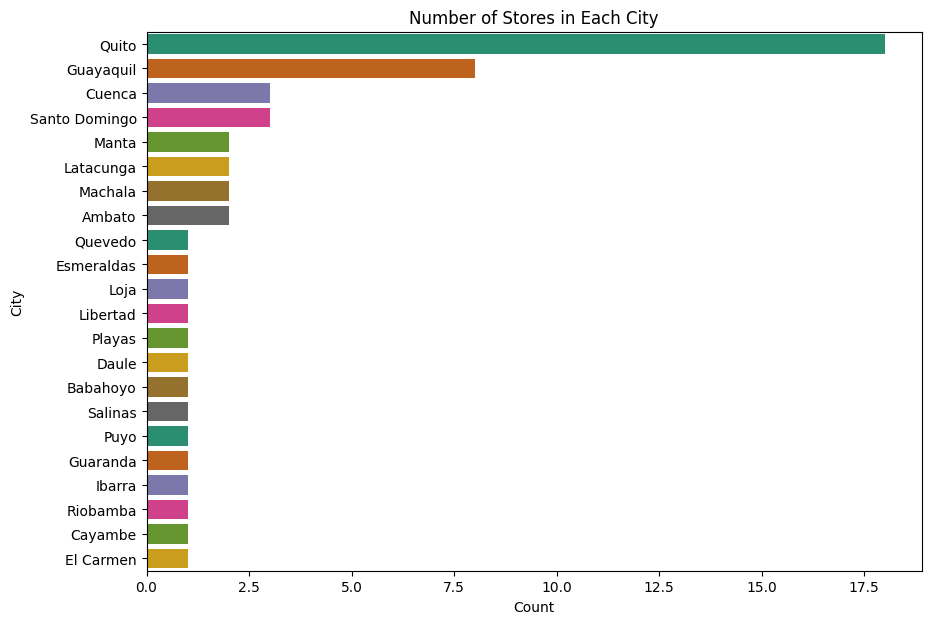

In [25]:
##exploring city column
city_counts = stores['city'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='Dark2')
plt.title('Number of Stores in Each City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


<ipython-input-26-dcf1c0b67ab4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")


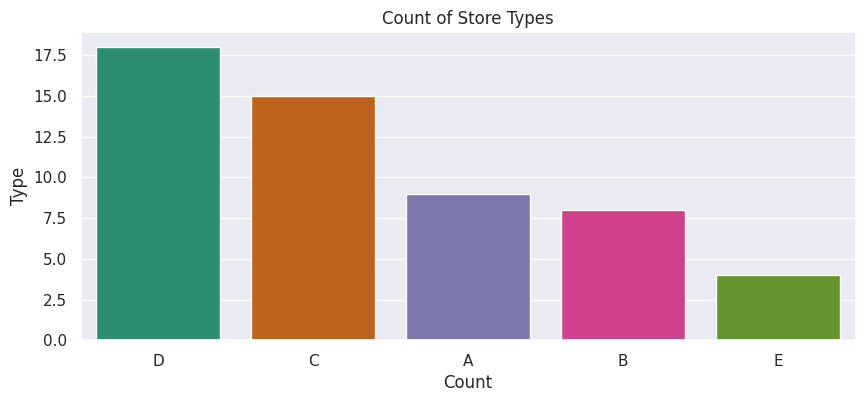

In [26]:
#exploring type column
type_counts = stores['type'].value_counts()

sns.set(rc={"figure.figsize": (10, 4)})
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")
plt.title("Count of Store Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

In [27]:
#exploring store_nbr
unique_values = len(stores['store_nbr'].unique())
print("Number of unique values in 'store_nbr':", unique_values)

Number of unique values in 'store_nbr': 54


In [28]:
trans.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [29]:
trans['date'] = pd.to_datetime(trans['date'], format='%Y-%m-%d')

In [30]:
#this copy will be used for the exploration
trans_c=trans.copy()

In [31]:
trans_c["date"].min(),trans_c["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [32]:
trans_c=trans_c.set_index("date")

In [33]:
trans_c.head()

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922

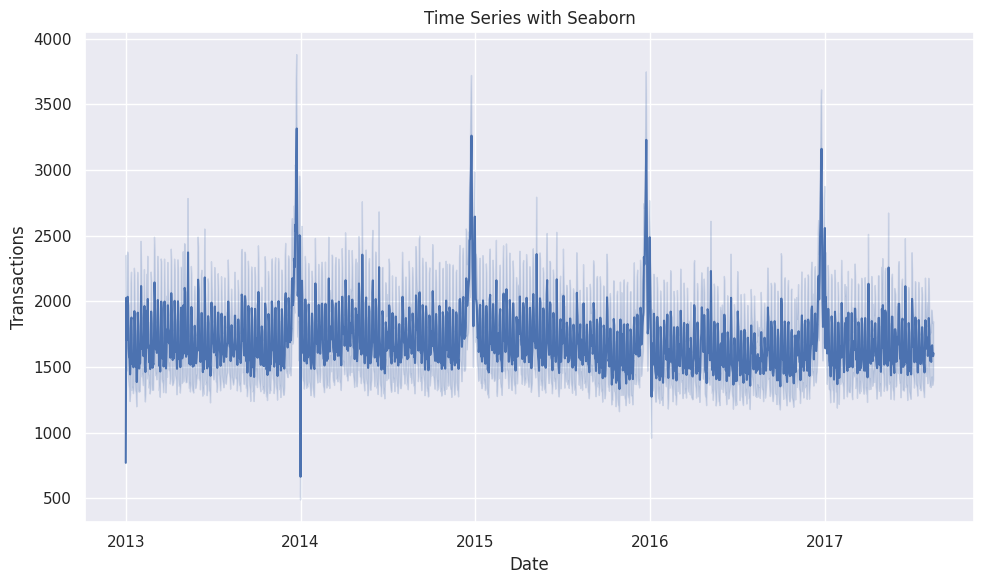

In [34]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=trans_c, x=trans_c.index, y='transactions')
plt.title('Time Series with Seaborn')
plt.xlabel('Date')
plt.ylabel('Transactions')

plt.tight_layout()

plt.show()

<Axes: >

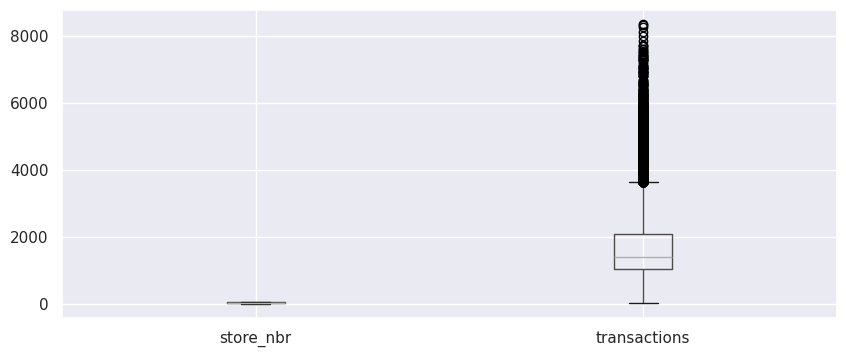

In [35]:
trans.boxplot()

In [36]:
## we will resample by months with median
month_trans=trans_c.drop(labels= "store_nbr",axis= 1).resample("M").median()
#view monthly transcations
month_trans.head()

<ipython-input-36-4c9677cb4474>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_trans=trans_c.drop(labels= "store_nbr",axis= 1).resample("M").median()


transactions
date                    
2013-01-31        1386.0
2013-02-28        1403.5
2013-03-31        1424.0
2013-04-30        1423.5
2013-05-31        1424.0

In [37]:
#plot our transcation time series for insights
fig = px.line(month_trans, x=month_trans.index, y='transactions', title='Monthly transcations')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [38]:
## explore store_nbr column
trans_c["store_nbr"].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

Text(0.5, 1.0, 'Top 10 Store with the Highest Transactions')

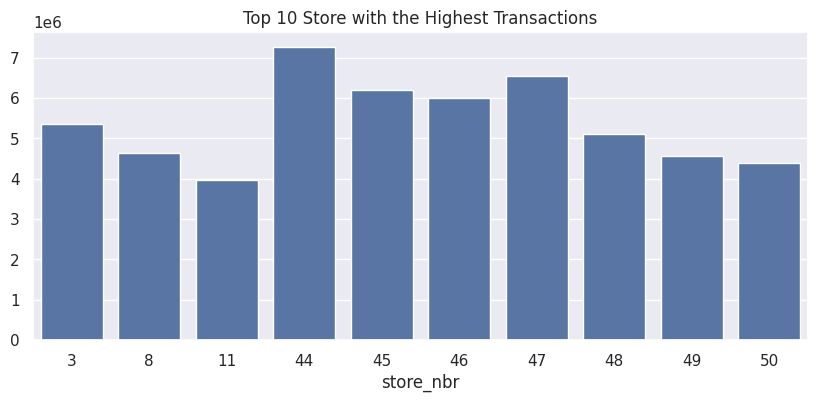

In [39]:
store_tran= trans_c.groupby("store_nbr")["transactions"].agg("sum").sort_values(ascending= False).head(10)

sns.barplot(x=store_tran.index, y=store_tran.values)


plt.title('Top 10 Store with the Highest Transactions')

In [40]:
holidays_events.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [41]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'], format='%Y-%m-%d')

In [42]:
holi_c=holidays_events.copy()

In [43]:
holi_c["date"].min(),holi_c["date"].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [44]:
holi_c["type"].value_counts()


type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

<ipython-input-45-2cd750be2484>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




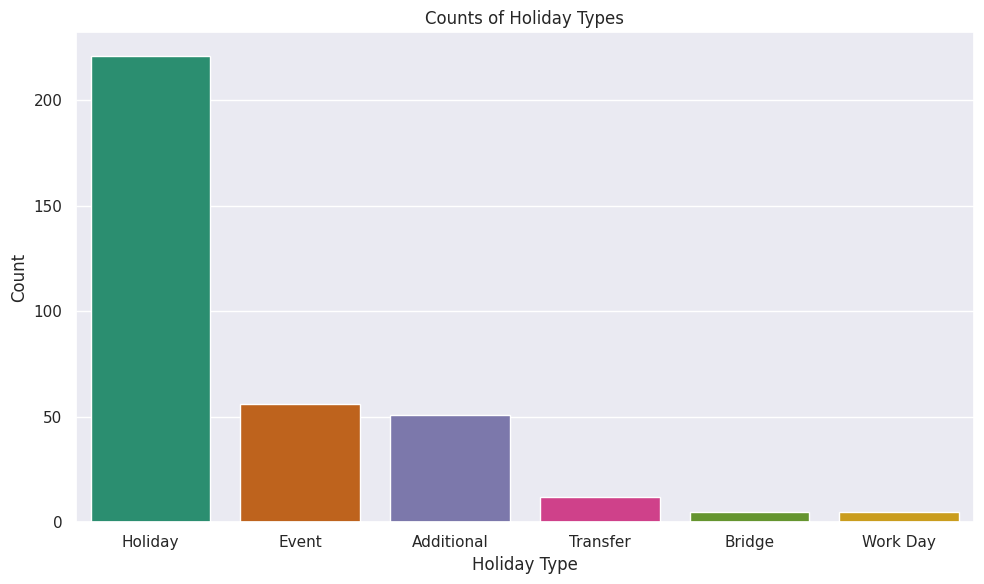

In [45]:
type_counts = holi_c["type"].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")
plt.title('Counts of Holiday Types')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

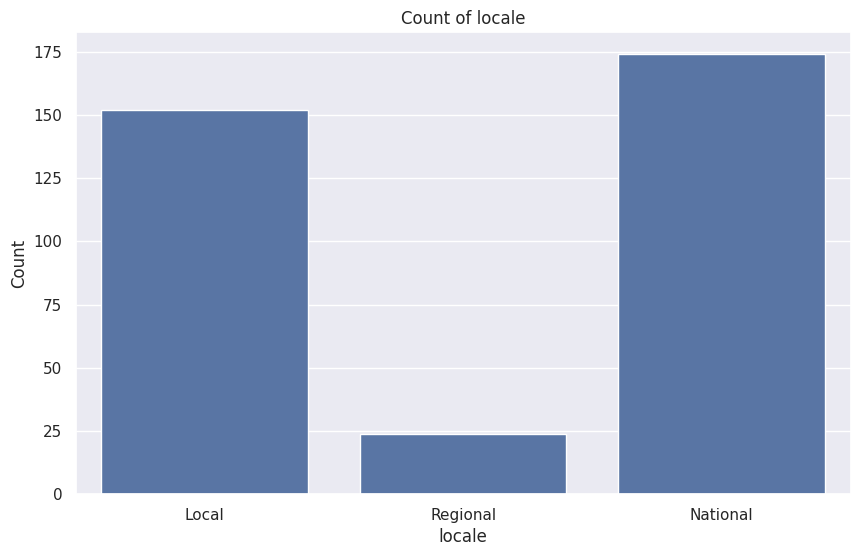

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=holi_c, x="locale")
plt.title(f'Count of {"locale"}')
plt.xlabel("locale")
plt.ylabel('Count')
plt.show()

In [47]:
holi_c["transferred"].value_counts()

transferred
False    338
True      12
Name: count, dtype: int64

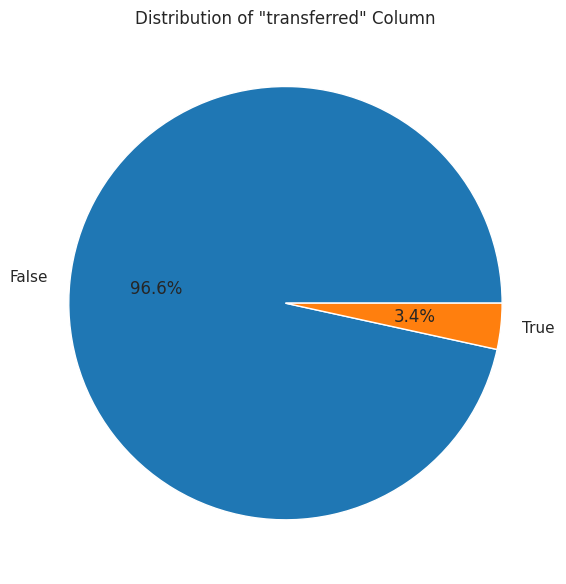

In [48]:
transferred_counts = holi_c["transferred"].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(transferred_counts, labels=transferred_counts.index,  colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
plt.title('Distribution of "transferred" Column')
plt.tight_layout()

plt.show()


In [49]:
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [50]:
oil['date'] = pd.to_datetime(oil['date'], format='%Y-%m-%d')

In [51]:
oil["date"].min(),oil["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [52]:
oil_c=oil.copy()
##set date as index
oil_c= oil_c.set_index("date")

In [53]:
oil_c.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [54]:
oil_c.isnull().sum()

dcoilwtico    43
dtype: int64

In [55]:
oil_c["dcoilwtico"].fillna(method= "bfill",inplace=True)

<ipython-input-55-8e43668df4b9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-55-8e43668df4b9>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [56]:
oil_c.head()

dcoilwtico
date                  
2013-01-01       93.14
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [57]:
oil_c.isnull().sum()

dcoilwtico    0
dtype: int64

In [58]:
fig = px.line(oil_c, x=oil_c.index, y='dcoilwtico',title='Oil Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [59]:
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [60]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

In [61]:
train["date"].min(),train["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [62]:
train_c=train.copy()

In [63]:
train_c=train_c.set_index("date")
#view train data
train_c.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

Univariate Analysis

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'store_nbr'}>],
       [<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'onpromotion'}>]], dtype=object)

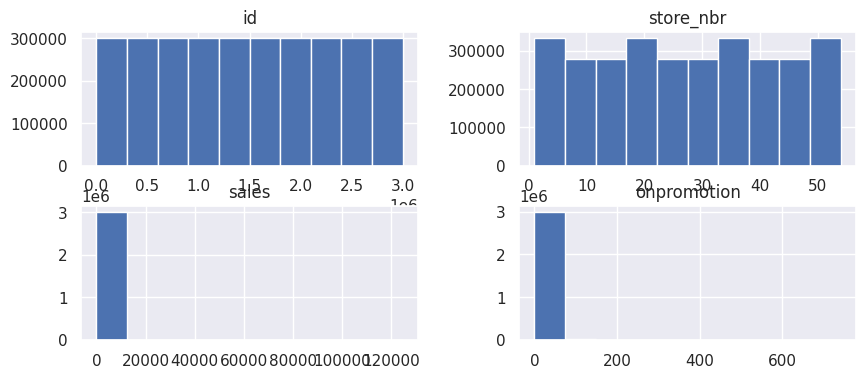

In [64]:
train_c.hist()

<Axes: >

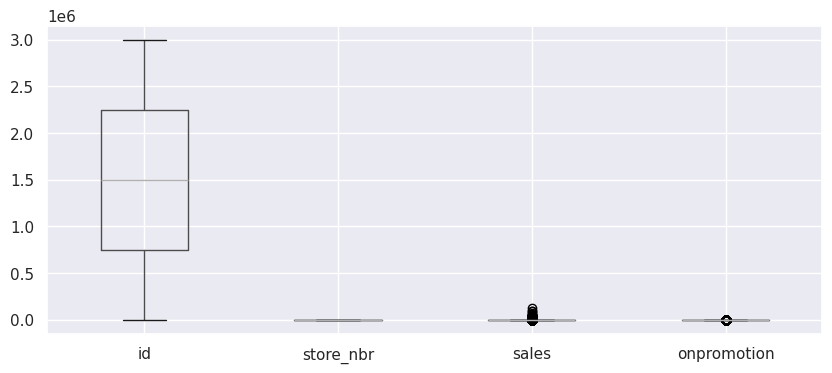

In [65]:
train_c.boxplot()

In [66]:
train_c["family"].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                   90936
BREAD/BAKERY                  90936
BOOKS                         90936
BEVERAGES                     90936
BEAUTY                        90936
SEAFOOD                       90936
Name: count, dtype: int64

Text(0.5, 1.0, 'Time Series On Onpromtion')

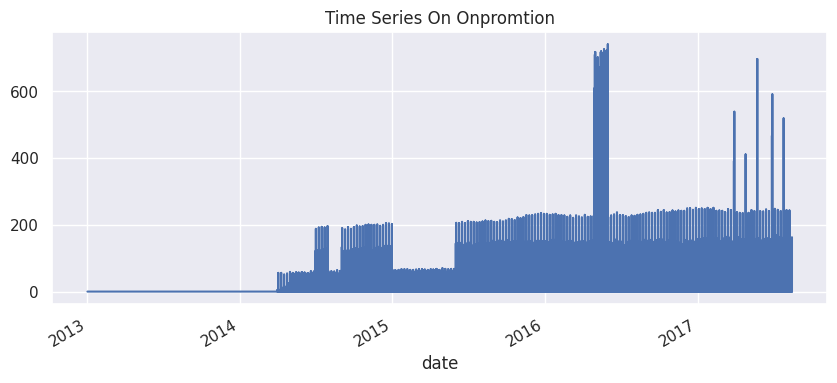

In [67]:
ax=train_c["onpromotion"].plot()
plt.title('Time Series On Onpromtion')


In [68]:
daily_promo = train_c.groupby('date')['onpromotion'].sum()

# Convert the series to a DataFrame for plotting
daily_promo = daily_promo.to_frame()

In [69]:
fig = px.line(daily_promo, x=daily_promo.index, y='onpromotion',title=("Daily Promotions"))

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [70]:
month_promo=train_c[["onpromotion"]].resample("M").mean()

<ipython-input-70-d682a94157b7>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [71]:
fig = px.line(month_promo, x=month_promo.index, y='onpromotion',title=("Monthly Promotions"))

fig.update_xaxes(rangeslider_visible=True)
fig.show()


Text(0.5, 1.0, 'Sales with respect to Time')

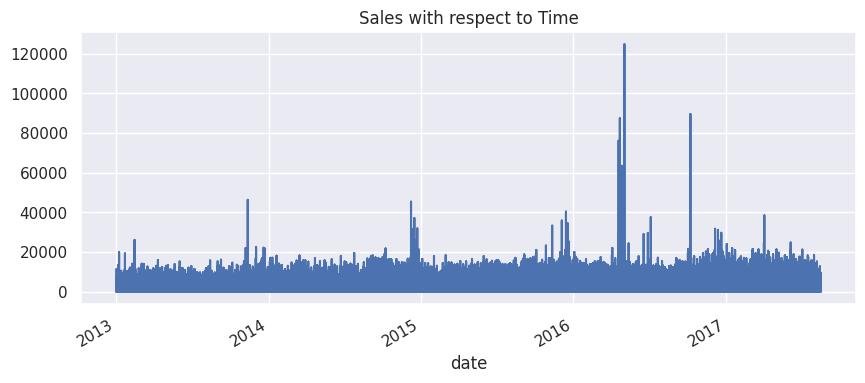

In [72]:
train_c.sales.plot()
plt.title("Sales with respect to Time")

<Axes: title={'center': 'Daily Sales'}, xlabel='date'>

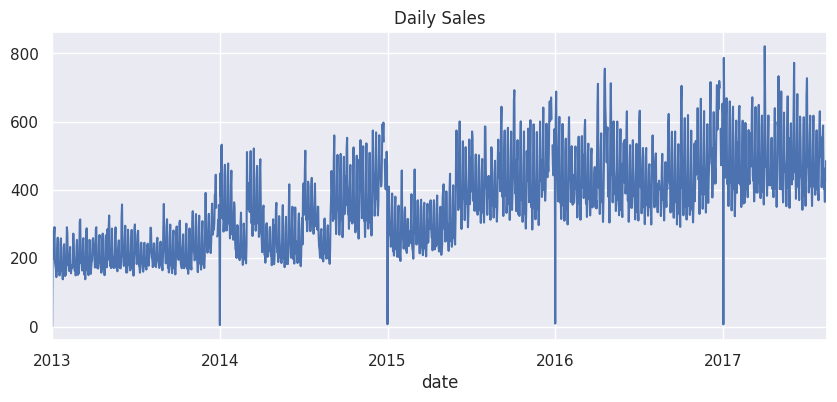

In [73]:
sale_daily=train_c["sales"].resample("D").mean()

plt.title("Daily Sales")

sale_daily.plot()

<Axes: title={'center': 'Weekly Sales'}, xlabel='date'>

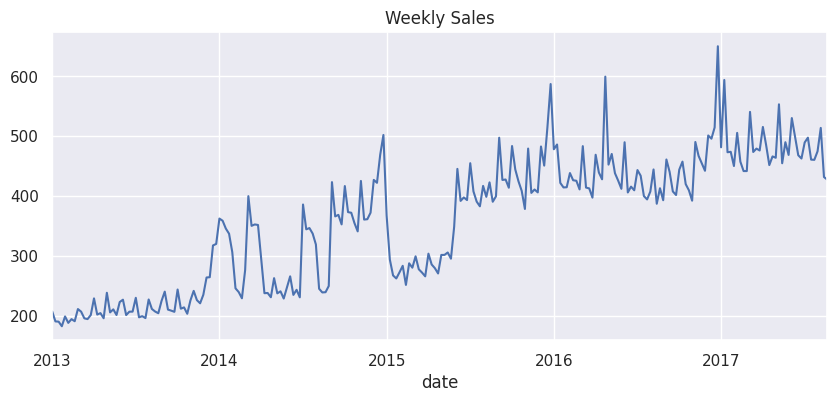

In [74]:
sale_weekly=train_c["sales"].resample("W").mean()

plt.title("Weekly Sales")

sale_weekly.plot()

<ipython-input-75-c0dca5722ff6>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: title={'center': 'Monthly Sales'}, xlabel='date'>

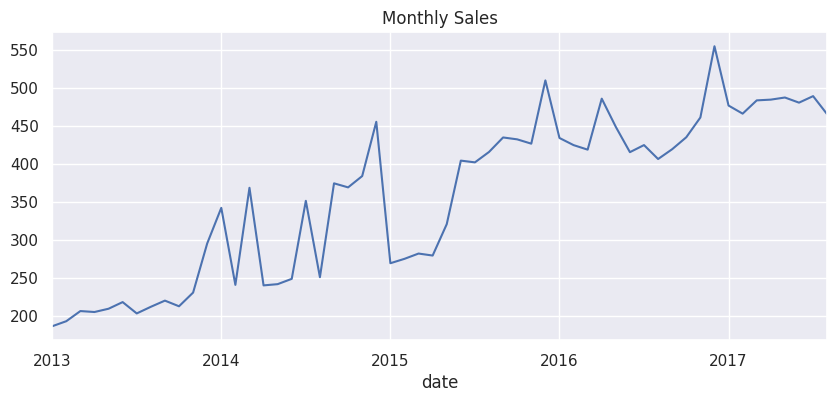

In [75]:
sale_monthly=train_c["sales"].resample("M").mean()

plt.title("Monthly Sales")

sale_monthly.plot()

Multivariate Analysis


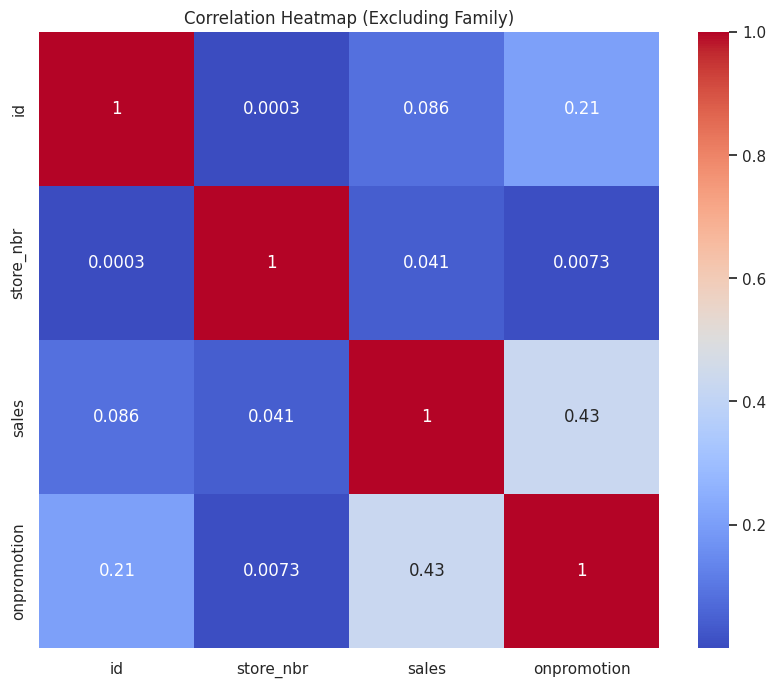

In [76]:
corr_matrix = train_c.drop(columns=['family']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding Family)')
plt.show()

In [77]:
merge_data = pd.merge(train, trans, how='outer', on=['date', 'store_nbr'])
merge_data1 = pd.merge(merge_data, oil, how='outer', on='date')
merge_data2= pd.merge(merge_data1, holidays_events, how='outer', on='date')

In [78]:
start_date = '2013-01-01'
end_date = '2017-08-15'
merge_data3 = merge_data2[merge_data2['date'].between(start_date, end_date)]

In [79]:
merge_data3.head()

id       date  store_nbr      family  sales  onpromotion  transactions  \
41  0.0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0           NaN   
42  1.0 2013-01-01        1.0   BABY CARE    0.0          0.0           NaN   
43  2.0 2013-01-01        1.0      BEAUTY    0.0          0.0           NaN   
44  3.0 2013-01-01        1.0   BEVERAGES    0.0          0.0           NaN   
45  4.0 2013-01-01        1.0       BOOKS    0.0          0.0           NaN   

    dcoilwtico     type    locale locale_name         description transferred  
41         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
42         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
43         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
44         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
45         NaN  Holiday  National     Ecuador  Primer dia del ano       False

In [80]:
merged_data_copy = merge_data3.copy()

In [81]:
# Split onpromotion variable into promoted products and non-promoted products
promoted_data = merged_data_copy[merged_data_copy['onpromotion'] >= 1]
non_promoted_data = merged_data_copy[merged_data_copy['onpromotion'] < 1]


In [82]:
# Calculate average sales for promoted and non-promoted products
average_sales_promoted = promoted_data['sales'].mean()
average_sales_non_promoted = non_promoted_data['sales'].mean()

In [83]:
t_statistic, p_value = stats.ttest_ind(promoted_data['sales'], non_promoted_data['sales'], equal_var=False)

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print the results with p-value formatted to three decimal places
print("Average sales for promoted products:", average_sales_promoted)
print("Average sales for non-promoted products:", average_sales_non_promoted)
print("T-statistic:", t_statistic)
print(f"P-value: {p_value:.3f}")  # Format p-value to three decimal places
print("Conclusion:", result)

Average sales for promoted products: 1139.828694789328
Average sales for non-promoted products: 157.81047220093515
T-statistic: 395.83372114047927
P-value: 0.000
Conclusion: Reject the null hypothesis


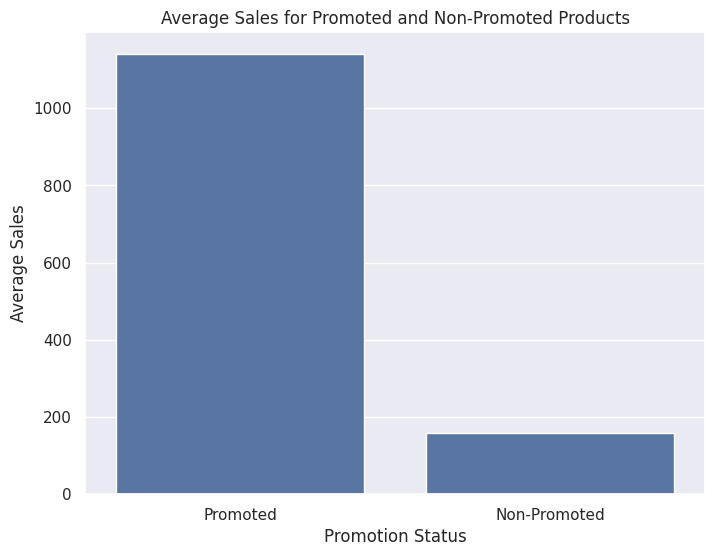

In [84]:
average_sales_promoted = promoted_data['sales'].mean()
average_sales_non_promoted = non_promoted_data['sales'].mean()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Promoted', 'Non-Promoted'], y=[average_sales_promoted, average_sales_non_promoted])
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.title('Average Sales for Promoted and Non-Promoted Products')
plt.show()

In [85]:
merged_data_copy['year'] = merged_data_copy['date'].dt.year


In [86]:
# Group by year and calculate min and max sales
yearly_sales_stats = merged_data_copy.groupby('year')['sales'].agg([('min_sales', 'min'), ('max_sales', 'max')])


In [87]:
lowest_sales_dates = merged_data_copy.loc[merged_data_copy.groupby('year')['sales'].idxmin(), ['year', 'date', 'sales']]
highest_sales_dates = merged_data_copy.loc[merged_data_copy.groupby('year')['sales'].idxmax(), ['year', 'date', 'sales']]

print("\nDates with Lowest Sales for Each Year:")
lowest_sales_dates


Dates with Lowest Sales for Each Year:


year       date  sales
41       2013 2013-01-01    0.0
657600   2014 2014-01-01    0.0
1316941  2015 2015-01-01    0.0
1972718  2016 2016-01-01    0.0
2642751  2017 2017-01-01    0.0

In [88]:
print("\nDates with Highest Sales for Each Year:")
highest_sales_dates


Dates with Highest Sales for Each Year:


year       date       sales
569930   2013 2013-11-12   46271.000
1273524  2014 2014-12-08   45361.000
1941775  2015 2015-12-14   40351.460
2193731  2016 2016-05-02  124717.000
2805189  2017 2017-04-02   38422.625

<ipython-input-89-6da53acd455c>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-89-6da53acd455c>:19: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



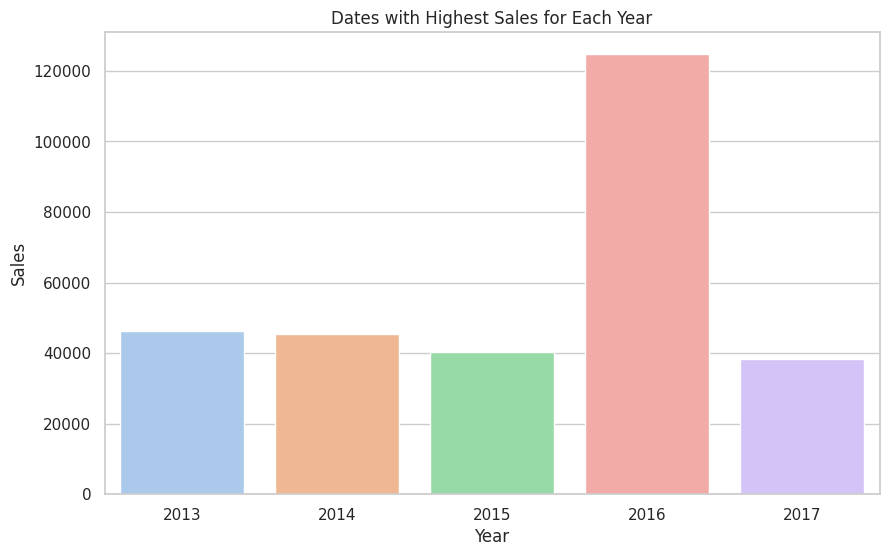

In [89]:
data = {
    'year': [2013, 2014, 2015, 2016, 2017],
    'date': ['2013-11-12', '2014-12-08', '2015-12-14', '2016-05-02', '2017-04-02'],
    'sales': [46271.0, 45361.0, 40351.46, 124717.0, 38422.625]
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Set Seaborn style
sns.set(style="whitegrid")

# Define a color palette
colors = sns.color_palette("pastel")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='sales', data=df, palette=colors)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Dates with Highest Sales for Each Year')
plt.show()

In [90]:
# Group data by store number and calculate total sales for each store
store_sales = train.groupby('store_nbr')['sales'].sum()

top_10_stores = store_sales.sort_values(ascending=False).head(10)

print("Top 10 Stores by Total Sales:")
print(top_10_stores)

Top 10 Stores by Total Sales:
store_nbr
44    6.208755e+07
45    5.449801e+07
47    5.094831e+07
3     5.048191e+07
49    4.342010e+07
46    4.189606e+07
48    3.593313e+07
51    3.291149e+07
8     3.049429e+07
50    2.865302e+07
Name: sales, dtype: float64


<ipython-input-91-70b888ff2744>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




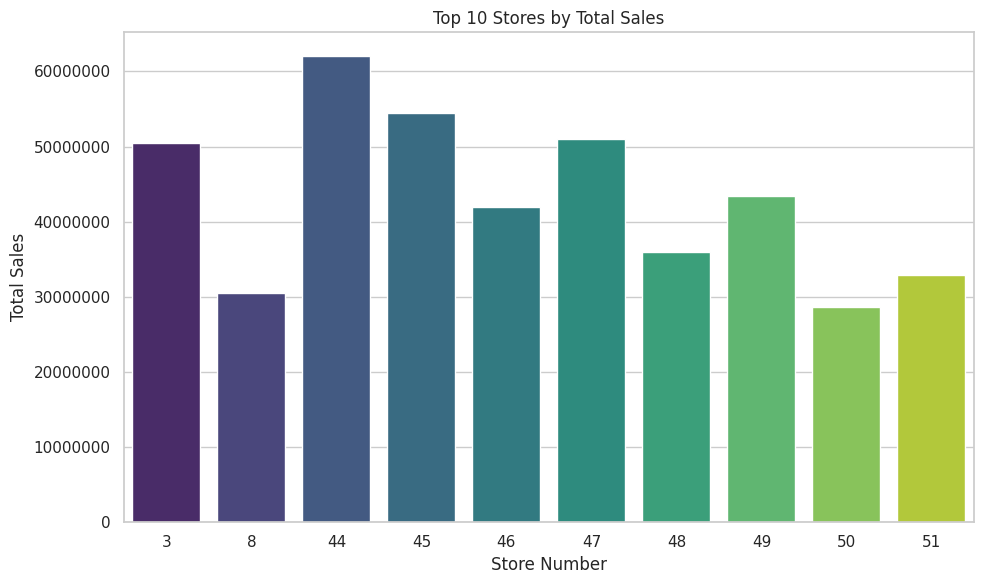

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stores.index, y=top_10_stores.values, palette="viridis")
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Prevent scientific notation
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # Prevent offset notation
plt.tight_layout()
plt.show()

In [92]:
# Group data by family and calculate total sales for each family
family_sales = train.groupby('family')['sales'].sum()

top_5_families = family_sales.sort_values(ascending=False).head(5)

print("Top 5 Families by Total Sales:")
print(top_5_families)

Top 5 Families by Total Sales:
family
GROCERY I    3.434627e+08
BEVERAGES    2.169545e+08
PRODUCE      1.227047e+08
CLEANING     9.752129e+07
DAIRY        6.448771e+07
Name: sales, dtype: float64


<ipython-input-93-03a797314227>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




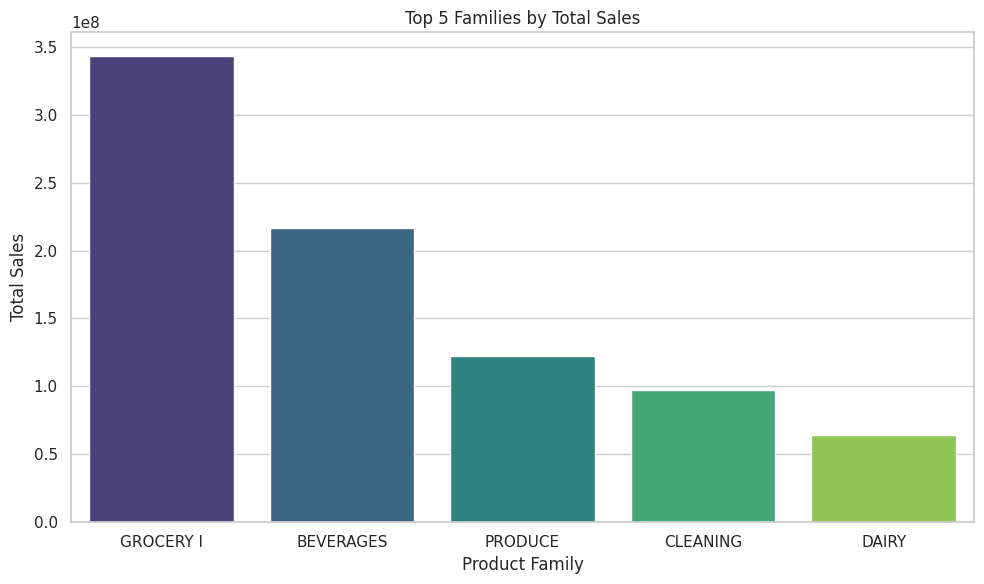

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_families.index, y=top_5_families.values, palette="viridis")
plt.title('Top 5 Families by Total Sales')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [94]:
# Calculate the correlation between transactions and sales
correlation = merged_data_copy['transactions'].corr(merged_data_copy['sales'])
# Print the correlation value
print("Correlation between Transactions and Sales:", correlation)

Correlation between Transactions and Sales: 0.21484819600856703


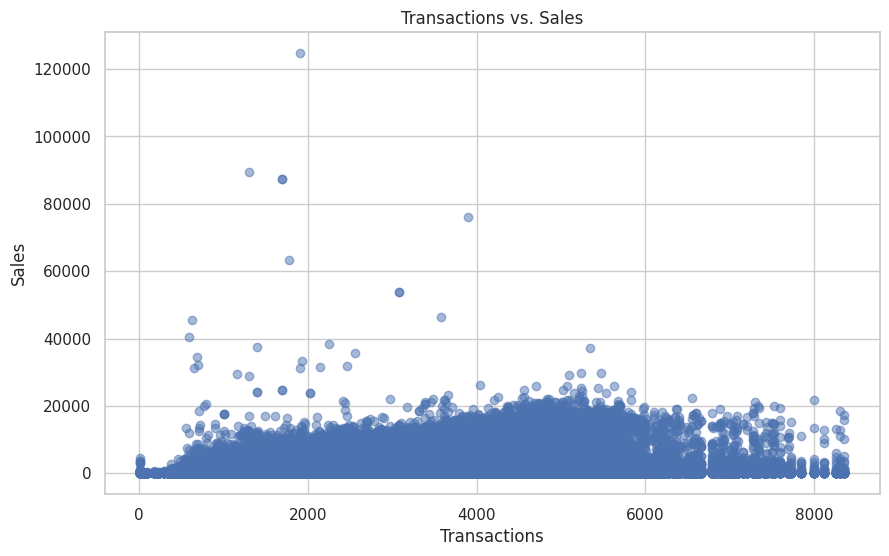

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_copy['transactions'], merged_data_copy['sales'], alpha=0.5)
plt.title('Transactions vs. Sales')
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.show()

In [96]:
# Calculate the correlation between sales and oil prices
correlation_sales_oil = merged_data_copy['sales'].corr(merged_data_copy['dcoilwtico'])
# Print the correlation coefficient
print("Correlation between Sales and Oil Prices:", correlation_sales_oil)

Correlation between Sales and Oil Prices: -0.07939344988982741


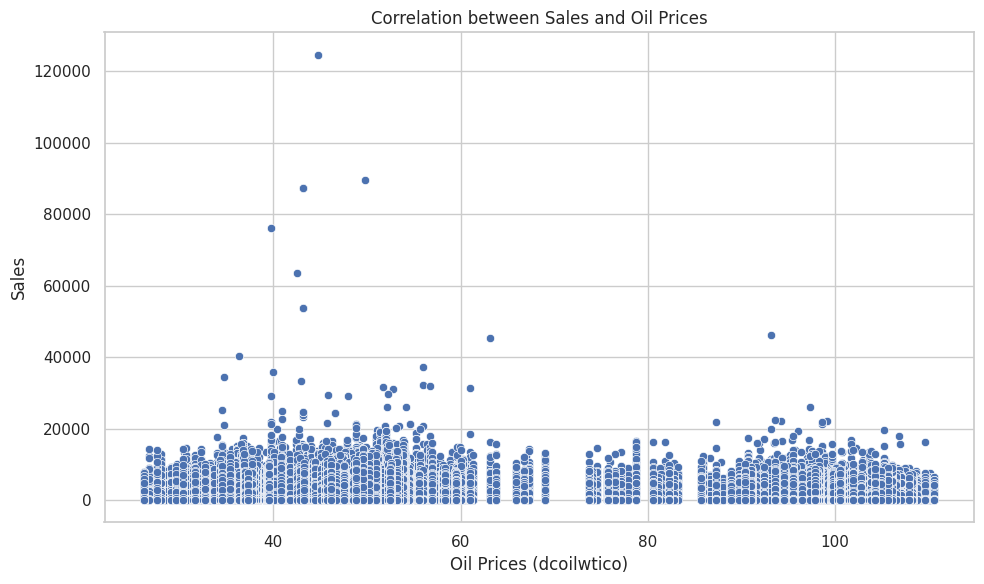

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_copy, x='dcoilwtico', y='sales')
plt.title('Correlation between Sales and Oil Prices')
plt.xlabel('Oil Prices (dcoilwtico)')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [98]:
merge_data3.head()

id       date  store_nbr      family  sales  onpromotion  transactions  \
41  0.0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0           NaN   
42  1.0 2013-01-01        1.0   BABY CARE    0.0          0.0           NaN   
43  2.0 2013-01-01        1.0      BEAUTY    0.0          0.0           NaN   
44  3.0 2013-01-01        1.0   BEVERAGES    0.0          0.0           NaN   
45  4.0 2013-01-01        1.0       BOOKS    0.0          0.0           NaN   

    dcoilwtico     type    locale locale_name         description transferred  
41         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
42         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
43         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
44         NaN  Holiday  National     Ecuador  Primer dia del ano       False  
45         NaN  Holiday  National     Ecuador  Primer dia del ano       False

In [99]:
final_merge=merge_data3.drop(["family","id","store_nbr","locale_name","description"],axis=1)

In [100]:
final_merge.head()

date  sales  onpromotion  transactions  dcoilwtico     type  \
41 2013-01-01    0.0          0.0           NaN         NaN  Holiday   
42 2013-01-01    0.0          0.0           NaN         NaN  Holiday   
43 2013-01-01    0.0          0.0           NaN         NaN  Holiday   
44 2013-01-01    0.0          0.0           NaN         NaN  Holiday   
45 2013-01-01    0.0          0.0           NaN         NaN  Holiday   

      locale transferred  
41  National       False  
42  National       False  
43  National       False  
44  National       False  
45  National       False

In [101]:
final_merge.isnull().sum()

date                  0
sales                 4
onpromotion           4
transactions     249121
dcoilwtico       955156
type            2551824
locale          2551824
transferred     2551824
dtype: int64

In [102]:
#For transactions, we will replace the na values with 0 since it means no transaction was recorded on the said date


imputer = SimpleImputer(strategy='constant', fill_value=0)

final_merge["transactions"] = imputer.fit_transform(final_merge[["transactions"]])

In [103]:
#for sales and onpromotion we will drop the missing values
final_merge= final_merge.dropna(subset=["sales", "onpromotion"])

In [104]:
final_merge["type"]=final_merge["type"].replace(np.nan, "Not Holiday")

final_merge["locale"]=final_merge["locale"].replace(np.nan, "Not Holiday")

final_merge["transferred"]=final_merge["transferred"].replace(np.nan, "False")

final_merge["dcoilwtico"]= final_merge["dcoilwtico"].fillna(method= "bfill")

<ipython-input-104-34e802af9a9f>:7: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [105]:

final_merge.isnull().sum()

date            0
sales           0
onpromotion     0
transactions    0
dcoilwtico      0
type            0
locale          0
transferred     0
dtype: int64

In [106]:
final_merge= final_merge.rename(columns= {"type": "holiday"})
##Let's view the dataset
final_merge.head()

date  sales  onpromotion  transactions  dcoilwtico  holiday  \
41 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
42 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
43 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
44 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
45 2013-01-01    0.0          0.0           0.0       93.14  Holiday   

      locale transferred  
41  National       False  
42  National       False  
43  National       False  
44  National       False  
45  National       False

In [107]:
#create univariate data for modelliing
univar_sale= train_c.drop(["id", "store_nbr", "family", "onpromotion"], axis=1)

In [108]:
univar_sale.head()

sales
date             
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0

In [109]:
# Grouping by date and aggregating sales
univar_sale= univar_sale.groupby(univar_sale.index).agg({"sales": sum})

<ipython-input-109-cf94235b74df>:2: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [110]:
fig = px.line(univar_sale, x=univar_sale.index, y='sales', title='Time Series with Slider')

# Add a slider for date selection
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


In [111]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(univar_sale)

In [112]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

if result[1]>0.05:
    print("Series is not stationary")
else:
    print("Series is stationarity")

ADF Statistic: -2.6161957486048584
p-value: 0.08969592175787444
Critical Values:
1%: -3.4342930672797065
5%: -2.8632816397229064
10%: -2.567697207194407
Series is not stationary


AUTO REGRESSIVE(AR) MODEL

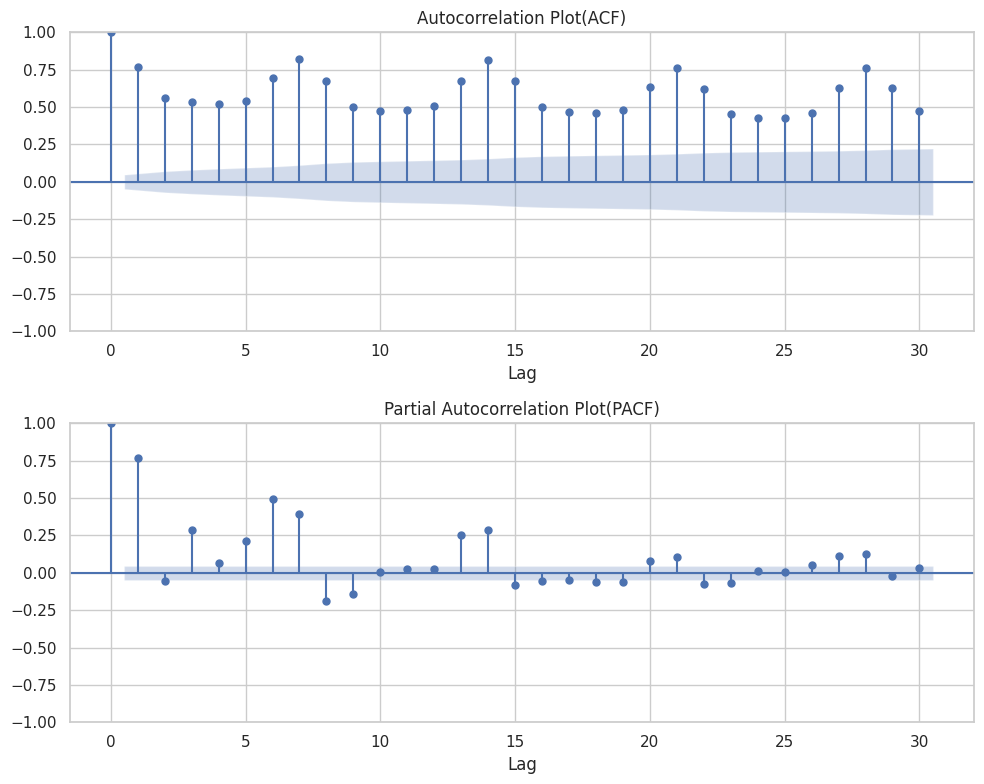

In [113]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the autocorrelation on the first subplot
plot_acf(univar_sale,lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Plot(ACF)')
axes[0].set_xlabel('Lag')

# Plot the partial autocorrelation on the second subplot
plot_pacf(univar_sale,lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Plot(PACF)')
axes[1].set_xlabel('Lag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [114]:
univar_sale.shape

(1684, 1)

In [115]:
train_1=univar_sale[0:1347]
test_1=univar_sale[1347:]

In [116]:
train_1.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

In [117]:
model= AutoReg(train_1, lags=10).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1347
Model:                    AutoReg(10)   Log Likelihood              -17227.741
Method:               Conditional MLE   S.D. of innovations          95457.144
Date:                Sat, 09 Nov 2024   AIC                          34479.483
Time:                        21:21:41   BIC                          34541.861
Sample:                            10   HQIC                         34502.854
                                 1347                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.33e+04   9236.630      3.605      0.000    1.52e+04    5.14e+04
sales.L1       0.6421      0.027     23.504      0.000       0.589       0.696
sales.L2      -0.1269      0.032     -3.941      0.000      -0.190      -0.064
sales.L3       0.1310      0.032      4.092      0.000       0.068       0.194
sales.L4      -0.0247      0.030     -0.831      0.406      -0.083       0.034
sales.L5      -0.0761      0.029     -2.613      0.009      -0.133      -0.019
sales.L6       0.2233      0.029      7.665      0.000       0.166       0.280
sales.L7       0.4560      0.030     15.322      0.000       0.398       0.514
sales.L8      -0.1767      0.032     -5.508      0.000      -0.240      -0.114
sales.L9      -0.1485      0.032     -4.624      0.000      -0.211      -0.086
sales.L10      0.0454      0.027      1.671      0.095      -0.008       0.099
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.2286           -1.0233j            1.0486           -0.2850
AR.2            -0.2286           +1.0233j            1.0486            0.2850
AR.3            -1.0890           -0.6527j            1.2696           -0.4141
AR.4            -1.0890           +0.6527j            1.2696            0.4141
AR.5            -1.7309           -0.0000j            1.7309           -0.5000
AR.6             0.6424           -0.8183j            1.0403           -0.1441
AR.7             0.6424           +0.8183j            1.0403            0.1441
AR.8             1.0211           -0.0000j            1.0211           -0.0000
AR.9             1.8854           -0.0000j            1.8854           -0.0000
AR.10            3.4469           -0.0000j            3.4469           -0.0000
------------------------------------------------------------------------------
"""

In [119]:
AR_pred = model.predict(start=len(train_1), end=len(train_1) + len(test_1) - 1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



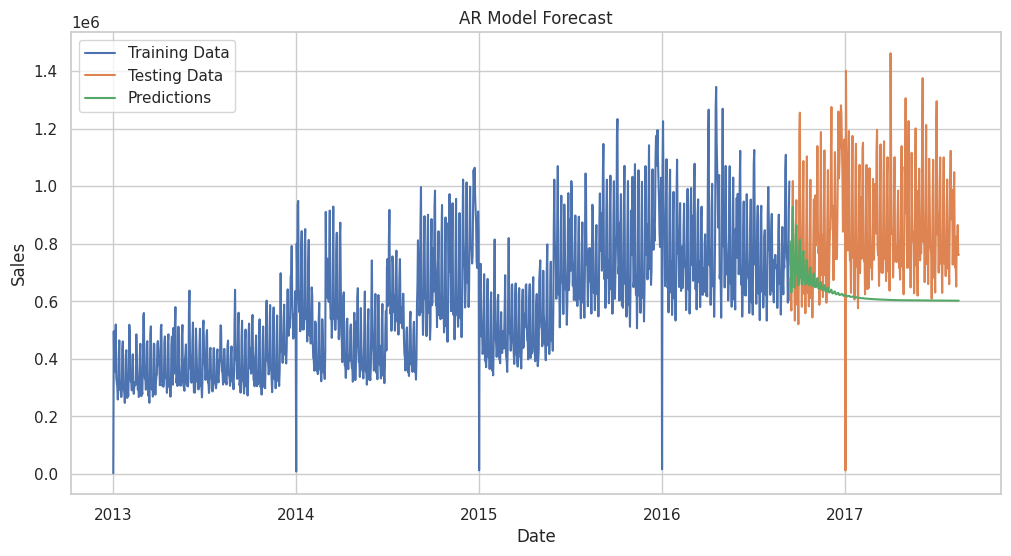

In [120]:
# Plot the actual values (training and testing data)
plt.figure(figsize=(12, 6))
plt.plot(train_1.index, train_1['sales'], label='Training Data')
plt.plot(test_1.index, test_1['sales'], label='Testing Data')

# Plot the predictions
plt.plot(test_1.index, AR_pred, label='Predictions')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title('AR Model Forecast')

# Show the plot
plt.show()

In [121]:
mse=mean_squared_error(test_1,AR_pred)
msle=mean_squared_log_error(test_1,AR_pred)
rmse=np.sqrt(mean_squared_error(test_1,AR_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(test_1,AR_pred)).round(2)

results=pd.DataFrame([["AR",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results

Model           MSE      MSLE      RMSE  RMSLE
0    AR  8.542853e+10  0.174035  292281.6   0.42

ARIMA MODEL

In [122]:
stepwise_fit=auto_arima(train_1["sales"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35306.299, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35805.450, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35807.053, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=35752.468, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35803.487, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=35322.288, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=35318.840, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=35349.741, Time=1.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=35270.054, Time=1.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=35335.456, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=35142.104, Time=7.73 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=34785.941, Time=6.02 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=34805.179, Time=4.39 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=34781.184, Time=8.50 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1347
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -17250.793
Date:                Sat, 09 Nov 2024   AIC                          34523.586
Time:                        21:23:18   BIC                          34580.839
Sample:                             0   HQIC                         34545.030
                               - 1347                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2008      0.028     43.035      0.000       1.146       1.255
ar.L2         -1.7590      0.024    -74.187      0.000      -1.805      -1.713
ar.L3          1.3822      0.040     34.587      0.000       1.304       1.461
ar.L4         -1.3182      0.023    -58.261      0.000      -1.363      -1.274
ar.L5          0.4094      0.028     14.879      0.000       0.355       0.463
ma.L1         -1.6234      0.025    -64.760      0.000      -1.673      -1.574
ma.L2          1.9739      0.033     59.190      0.000       1.909       2.039
ma.L3         -1.8473      0.038    -48.947      0.000      -1.921      -1.773
ma.L4          1.4612      0.029     49.668      0.000       1.403       1.519
ma.L5         -0.7682      0.022    -35.505      0.000      -0.811      -0.726
sigma2      9.715e+09   7.48e-12    1.3e+21      0.000    9.72e+09    9.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             19640.31
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.67e+36. Standard errors may be unstable.
"""

In [123]:
model1=ARIMA(train_1,order=(5,1,5)).fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -17250.793
Date:                Sat, 09 Nov 2024   AIC                          34523.586
Time:                        21:23:24   BIC                          34580.839
Sample:                             0   HQIC                         34545.030
                               - 1347                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2008      0.028     43.035      0.000       1.146       1.255
ar.L2         -1.7590      0.024    -74.187      0.000      -1.805      -1.713
ar.L3          1.3822      0.040     34.587      0.000       1.304       1.461
ar.L4         -1.3182      0.023    -58.261      0.000      -1.363      -1.274
ar.L5          0.4094      0.028     14.879      0.000       0.355       0.463
ma.L1         -1.6234      0.025    -64.760      0.000      -1.673      -1.574
ma.L2          1.9739      0.033     59.190      0.000       1.909       2.039
ma.L3         -1.8473      0.038    -48.947      0.000      -1.921      -1.773
ma.L4          1.4612      0.029     49.668      0.000       1.403       1.519
ma.L5         -0.7682      0.022    -35.505      0.000      -0.811      -0.726
sigma2      9.715e+09   7.48e-12    1.3e+21      0.000    9.72e+09    9.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             19640.31
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.67e+36. Standard errors may be unstable.
"""

In [124]:
ARIMA_pred=model1.predict(start=len(train_1), end=len(train_1) + len(test_1) - 1, typ="levels")
print(ARIMA_pred)

1347    810926.815027
1348    743841.120855
1349    750935.994689
1350    677524.220943
1351    727012.323302
1352    929291.103600
1353    946841.203700
1354    780185.401245
1355    733510.916894
1356    748491.261887
1357    677896.560230
1358    729130.997534
1359    928833.175239
1360    942072.900111
1361    776702.200235
1362    734442.544908
1363    750616.923251
1364    680093.646783
1365    731957.298877
1366    928646.364190
1367    937493.404012
1368    773412.597662
1369    735463.505239
1370    752702.593735
1371    682215.284356
1372    734708.922590
1373    928408.820369
1374    932969.345726
1375    770258.663082
1376    736547.281559
1377    754737.982794
1378    684259.732017
1379    737386.991595
1380    928121.968309
1381    928500.763752
1382    767237.571251
1383    737690.189843
1384    756722.271539
1385    686229.113942
1386    739994.144695
1387    927787.807861
1388    924087.925165
1389    764346.637292
1390    738888.691864
1391    758654.747379
1392    68

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



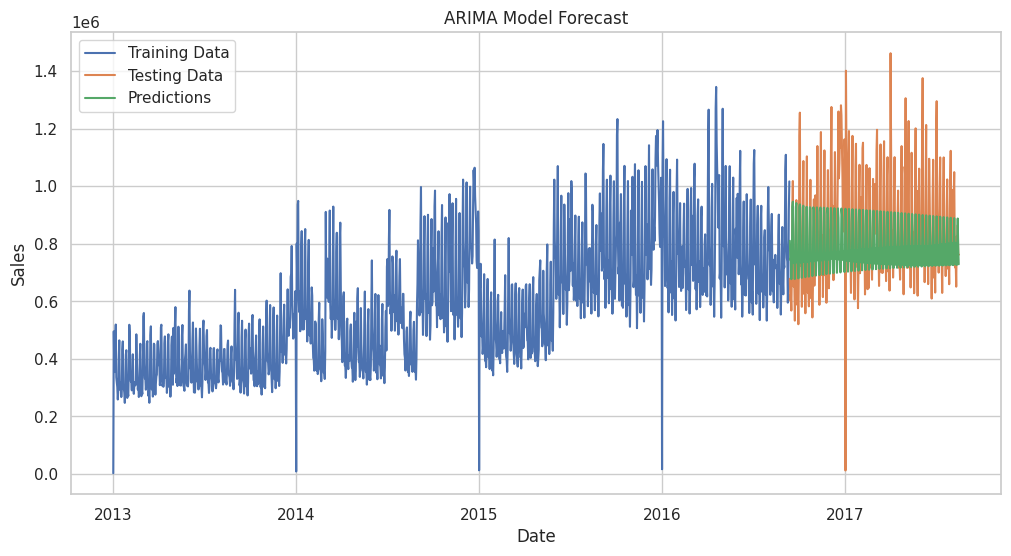

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(train_1.index, train_1, label='Training Data')
plt.plot(test_1.index, test_1, label='Testing Data')

# Plot the predictions
plt.plot(test_1.index, ARIMA_pred, label='Predictions')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')

# Show the plot
plt.show()

In [126]:
mse=mean_squared_error(test_1,ARIMA_pred)
msle=mean_squared_log_error(test_1,ARIMA_pred)
rmse=np.sqrt(mean_squared_error(test_1,ARIMA_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(test_1,ARIMA_pred)).round(2)

results1=pd.DataFrame([["ARIMA",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results1

Model           MSE      MSLE       RMSE  RMSLE
0  ARIMA  2.908160e+10  0.087933  170533.27    0.3

SARIMA MODEL

In [127]:
model2=SARIMAX(train_1,order=(6,1,7),seasonal_order=(1,1,1,12)).fit()
model2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sales   No. Observations:                 1347
Model:             SARIMAX(6, 1, 7)x(1, 1, [1], 12)   Log Likelihood              -17286.296
Date:                              Sat, 09 Nov 2024   AIC                          34604.591
Time:                                      21:24:22   BIC                          34687.726
Sample:                                           0   HQIC                         34635.744
                                             - 1347                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7996      0.469     -1.706      0.088      -1.718       0.119
ar.L2         -0.8831      0.126     -7.036      0.000      -1.129      -0.637
ar.L3         -0.9267      0.429     -2.160      0.031      -1.768      -0.086
ar.L4         -0.7571      0.181     -4.186      0.000      -1.111      -0.403
ar.L5         -1.0232      0.235     -4.350      0.000      -1.484      -0.562
ar.L6         -0.7037      0.333     -2.112      0.035      -1.357      -0.051
ma.L1          0.3449      0.465      0.741      0.459      -0.567       1.257
ma.L2          0.3012      0.300      1.005      0.315      -0.286       0.889
ma.L3          0.4200      0.349      1.204      0.229      -0.264       1.104
ma.L4          0.1649      0.192      0.860      0.390      -0.211       0.541
ma.L5          0.4709      0.129      3.658      0.000       0.219       0.723
ma.L6          0.0789      0.237      0.333      0.739      -0.385       0.543
ma.L7         -0.3738      0.203     -1.845      0.065      -0.771       0.023
ar.S.L12       0.0016      0.066      0.025      0.980      -0.128       0.131
ma.S.L12      -0.9654      0.025    -37.998      0.000      -1.015      -0.916
sigma2       1.79e+10   1.86e-11   9.61e+20      0.000    1.79e+10    1.79e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.48   Jarque-Bera (JB):             14303.62
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.8e+37. Standard errors may be unstable.
"""

In [128]:
SARIMA_pred=model2.predict(start=len(train_1), end=len(train_1) + len(test_1) - 1, typ="levels")
print(SARIMA_pred)

1347    8.301914e+05
1348    7.411150e+05
1349    7.361233e+05
1350    6.730556e+05
1351    7.508210e+05
1352    9.334912e+05
1353    9.698227e+05
1354    7.998982e+05
1355    7.397605e+05
1356    7.260061e+05
1357    6.752886e+05
1358    7.495571e+05
1359    9.671306e+05
1360    9.766729e+05
1361    8.051767e+05
1362    7.448915e+05
1363    7.487784e+05
1364    6.698560e+05
1365    7.485942e+05
1366    9.430641e+05
1367    9.669922e+05
1368    7.968143e+05
1369    7.470191e+05
1370    7.456865e+05
1371    7.015377e+05
1372    7.622984e+05
1373    9.512241e+05
1374    9.663274e+05
1375    8.189207e+05
1376    7.426024e+05
1377    7.419489e+05
1378    6.759030e+05
1379    7.596171e+05
1380    9.450564e+05
1381    9.634411e+05
1382    8.147705e+05
1383    7.758328e+05
1384    7.522769e+05
1385    6.830017e+05
1386    7.657351e+05
1387    9.692441e+05
1388    9.540698e+05
1389    8.100389e+05
1390    7.517660e+05
1391    7.460420e+05
1392    6.760603e+05
1393    7.695101e+05
1394    9.670

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



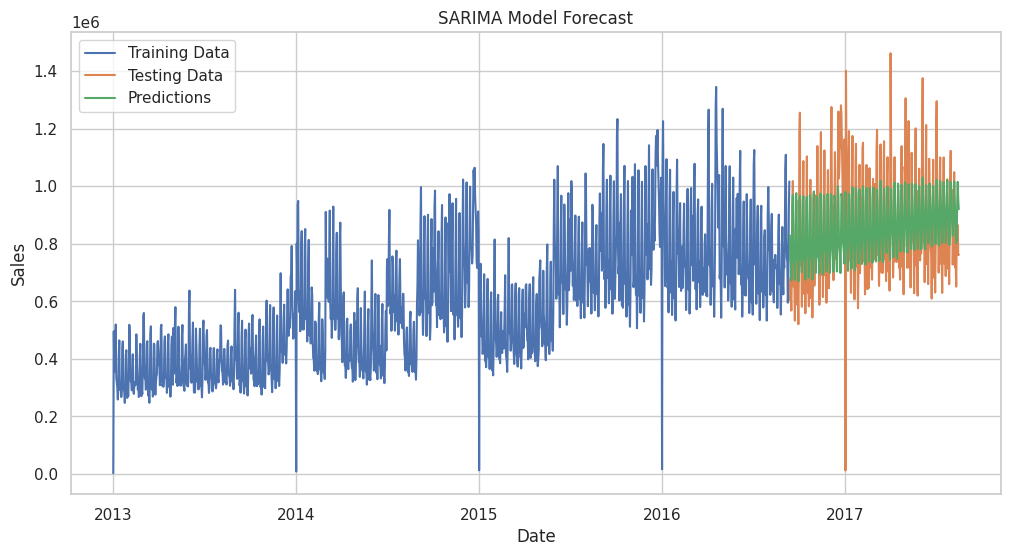

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(train_1.index, train_1, label='Training Data')
plt.plot(test_1.index, test_1, label='Testing Data')

# Plot the predictions
plt.plot(test_1.index, SARIMA_pred, label='Predictions')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title('SARIMA Model Forecast')

# Show the plot
plt.show()


In [130]:
mse=mean_squared_error(test_1,SARIMA_pred)
msle=mean_squared_log_error(test_1,SARIMA_pred)
rmse=np.sqrt(mean_squared_error(test_1,SARIMA_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(test_1,SARIMA_pred)).round(2)

results2=pd.DataFrame([["SARIMA",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results2

Model           MSE      MSLE       RMSE  RMSLE
0  SARIMA  2.344989e+10  0.083395  153133.55   0.29

In [131]:
combined_results = pd.concat([results, results1, results2])

# Reset the index
combined_results = combined_results.reset_index(drop=True)

# Sort the combined results table
combined_results = combined_results.sort_values(by="RMSLE")

# Display the combined results table
combined_results


Model           MSE      MSLE       RMSE  RMSLE
2  SARIMA  2.344989e+10  0.083395  153133.55   0.29
1   ARIMA  2.908160e+10  0.087933  170533.27   0.30
0      AR  8.542853e+10  0.174035  292281.60   0.42

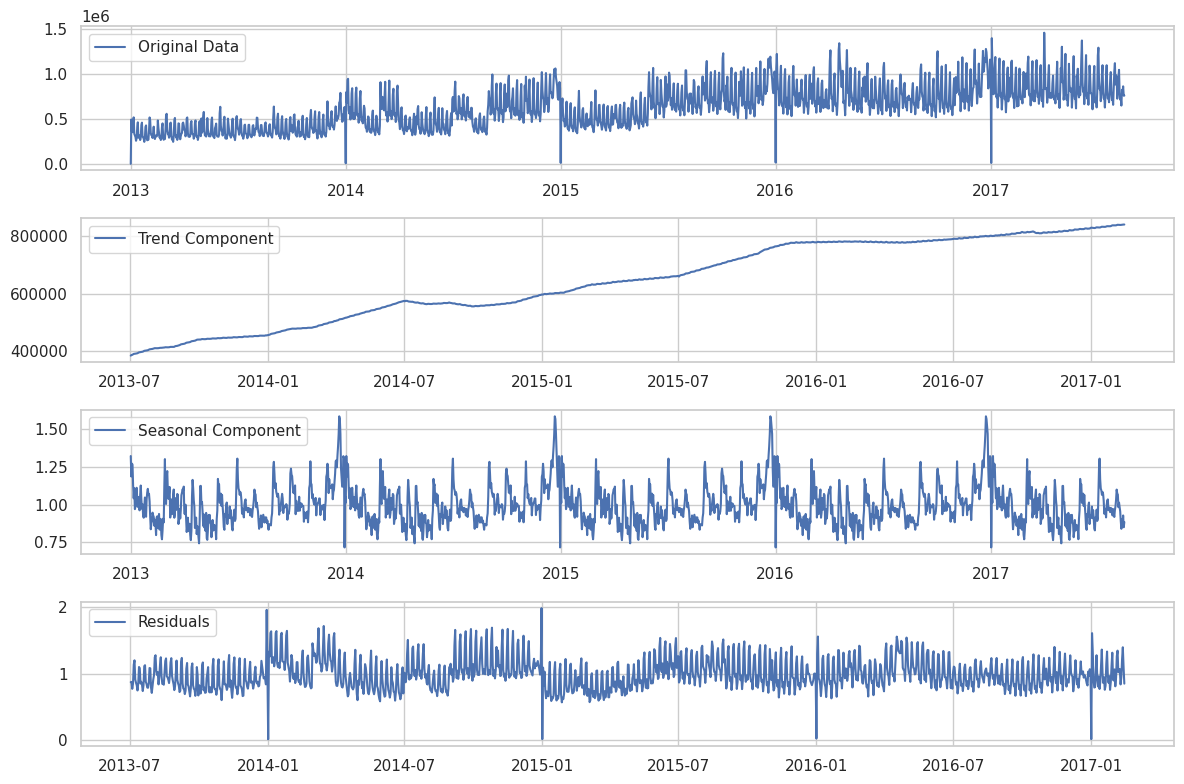

In [132]:
# Decompose the time series
decomposed_data = sm.tsa.seasonal_decompose(univar_sale, model='multiplicative', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)  # 4 rows, 1 column, subplot 1 (original data)
plt.plot(univar_sale, label='Original Data')
plt.legend()

plt.subplot(412)  # subplot 2 (trend component)
plt.plot(decomposed_data.trend, label='Trend Component')
plt.legend()

plt.subplot(413)  # subplot 3 (seasonal component)
plt.plot(decomposed_data.seasonal, label='Seasonal Component')
plt.legend()

plt.subplot(414)  # subplot 4 (residuals)
plt.plot(decomposed_data.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

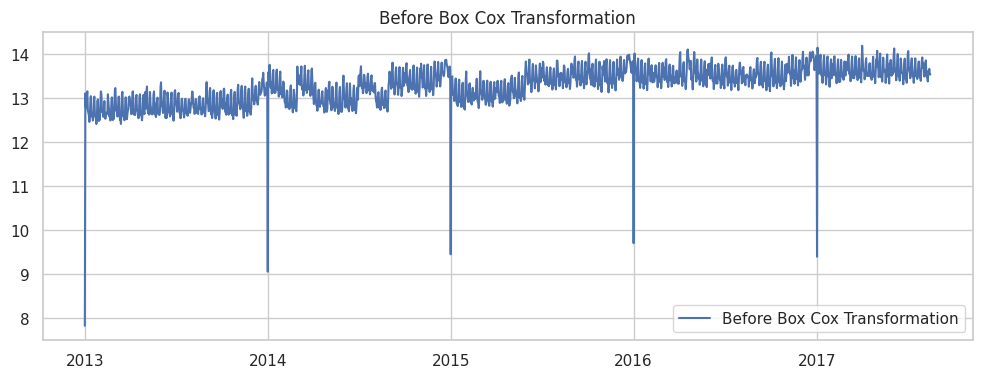

In [133]:
data_boxcox=pd.Series(boxcox(univar_sale["sales"],lmbda=0),index=univar_sale.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label='Before Box Cox Transformation')
plt.legend(loc='best')
plt.title('Before Box Cox Transformation')
plt.show()

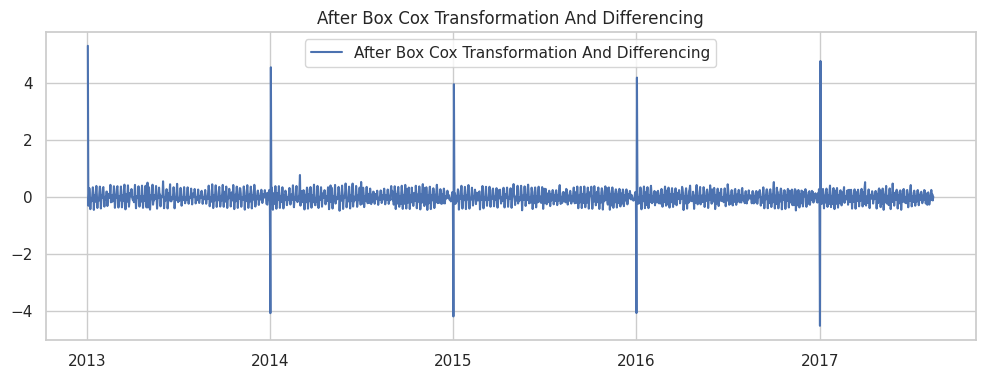

In [134]:
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),univar_sale.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label='After Box Cox Transformation And Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transformation And Differencing')
plt.show()


In [135]:
data_boxcox_diff = data_boxcox_diff.dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_test_result = adfuller(data_boxcox_diff)

# Print the ADF test results
print('ADF Statistic:', adf_test_result[0])
print('p-value:', adf_test_result[1])
print('Critical Values:')
for key, value in adf_test_result[4].items():
    print(f'{key}: {value}')

if adf_test_result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -11.119295401138787
p-value: 3.498563849922692e-20
Critical Values:
1%: -3.4343026006557427
5%: -2.863285847799246
10%: -2.5676994479374455
Series is stationary


In [136]:
final_merge.head()

date  sales  onpromotion  transactions  dcoilwtico  holiday  \
41 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
42 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
43 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
44 2013-01-01    0.0          0.0           0.0       93.14  Holiday   
45 2013-01-01    0.0          0.0           0.0       93.14  Holiday   

      locale transferred  
41  National       False  
42  National       False  
43  National       False  
44  National       False  
45  National       False

In [137]:
final_merge= final_merge.drop("transactions", axis= 1)

In [138]:
#since granger test uses only numeric columns we take our numeric columns

# Select numeric columns excluding 'sales' from final_merge
numeric_columns = final_merge.drop('sales', axis=1).select_dtypes(include=['number'])


print(numeric_columns.columns)

Index(['onpromotion', 'dcoilwtico'], dtype='object')


In [139]:
final_merge= final_merge.groupby(["date", "holiday","locale", "transferred" ]).agg({"sales": "sum", "onpromotion": "sum","dcoilwtico": "sum"})

In [140]:


final_merge.head()

sales  onpromotion  \
date       holiday     locale      transferred                               
2013-01-01 Holiday     National    False          2511.618999          0.0   
2013-01-02 Not Holiday Not Holiday False        496092.417944          0.0   
2013-01-03 Not Holiday Not Holiday False        361461.231124          0.0   
2013-01-04 Not Holiday Not Holiday False        354459.677093          0.0   
2013-01-05 Work Day    National    False        477350.121229          0.0   

                                                dcoilwtico  
date       holiday     locale      transferred              
2013-01-01 Holiday     National    False         165975.48  
2013-01-02 Not Holiday Not Holiday False         165975.48  
2013-01-03 Not Holiday Not Holiday False         165672.54  
2013-01-04 Not Holiday Not Holiday False         165939.84  
2013-01-05 Work Day    National    False         166082.40

In [141]:
final_merge=final_merge.reset_index()
#set date as index
final_merge= final_merge.set_index("date")

In [142]:
max_lag = 30

# Perform the Granger causality test
test_result = grangercausalitytests(final_merge[['onpromotion','sales']], max_lag, verbose=False)

# Print the test results
for lag in range(1, max_lag + 1):
    print(f'Lag {lag}:')
    print('F-statistic:', test_result[lag][0]['ssr_ftest'][0])
    print('p-value:', test_result[lag][0]['ssr_ftest'][1])
    print('---')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1:
F-statistic: 8.950975165949307
p-value: 0.002813159456618697
---
Lag 2:
F-statistic: 59.14071845075404
p-value: 1.4844646672222513e-25
---
Lag 3:
F-statistic: 161.11092256857194
p-value: 7.315832895654856e-92
---
Lag 4:
F-statistic: 121.14862016218378
p-value: 5.711823195088603e-91
---
Lag 5:
F-statistic: 112.31529782404306
p-value: 1.2661336307982008e-102
---
Lag 6:
F-statistic: 91.46694063397052
p-value: 1.5263318265360254e-99
---
Lag 7:
F-statistic: 22.497011978087208
p-value: 2.8176160045649227e-29
---
Lag 8:
F-statistic: 19.99198317525487
p-value: 4.557640276255107e-29
---
Lag 9:
F-statistic: 20.972580145286923
p-value: 7.353202471736866e-34
---
Lag 10:
F-statistic: 18.96693253080922
p-value: 2.2473087932770516e-33
---
Lag 11:
F-statistic: 17.678029217720386
p-value: 1.2463481124973822e-33
---
Lag 12:
F-statistic: 16.080516812828233
p-value: 9.723928870381566e-33
---
Lag 13:
F-statistic: 14.524459314493997
p-value: 2.2153754054485945e-31
---
Lag 14:
F-statistic: 9.691136512

In [143]:
max_lag = 30

# Perform the Granger causality test
test_result = grangercausalitytests(final_merge[['dcoilwtico','sales']], max_lag, verbose=False)

# Print the test results
for lag in range(1, max_lag + 1):
    print(f'Lag {lag}:')
    print('F-statistic:', test_result[lag][0]['ssr_ftest'][0])
    print('p-value:', test_result[lag][0]['ssr_ftest'][1])
    print('---')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1:
F-statistic: 116.5670155538413
p-value: 2.498578042210145e-26
---
Lag 2:
F-statistic: 24.43312022332906
p-value: 3.4579944633875145e-11
---
Lag 3:
F-statistic: 14.720880779115129
p-value: 1.8269427331403249e-09
---
Lag 4:
F-statistic: 8.011422183256672
p-value: 2.1373569445240404e-06
---
Lag 5:
F-statistic: 5.4836709464052795
p-value: 5.1633828770394806e-05
---
Lag 6:
F-statistic: 4.9876518669395145
p-value: 4.4854614234438514e-05
---
Lag 7:
F-statistic: 3.8146393599537696
p-value: 0.0004044930360469322
---
Lag 8:
F-statistic: 3.106583854486834
p-value: 0.0017374898603427851
---
Lag 9:
F-statistic: 2.5172439675749176
p-value: 0.007289306115527534
---
Lag 10:
F-statistic: 2.3276691447092297
p-value: 0.010131423251762238
---
Lag 11:
F-statistic: 2.1997561782037147
p-value: 0.012366270070467896
---
Lag 12:
F-statistic: 2.1439471720762433
p-value: 0.012193576385090416
---
Lag 13:
F-statistic: 1.9986177165849972
p-value: 0.017717500571762947
---
Lag 14:
F-statistic: 1.855064985342304

In [144]:
final_merge=final_merge.drop("dcoilwtico", axis= 1)

In [145]:
final_merge.head()


holiday       locale transferred          sales  onpromotion
date                                                                        
2013-01-01      Holiday     National       False    2511.618999          0.0
2013-01-02  Not Holiday  Not Holiday       False  496092.417944          0.0
2013-01-03  Not Holiday  Not Holiday       False  361461.231124          0.0
2013-01-04  Not Holiday  Not Holiday       False  354459.677093          0.0
2013-01-05     Work Day     National       False  477350.121229          0.0

In [146]:
final_merge.to_csv("final_clean_data.csv", index=False)


In [147]:
final_merge.shape

(1703, 5)

In [148]:
#we split the data into train and test
s_train=final_merge[0:1362]
s_test=final_merge[1362:]


In [149]:
s_train["transferred"].unique()


array([False, 'False', True], dtype=object)

In [150]:
#replacing false string with boolean false
s_train["transferred"]= s_train["transferred"].replace("False", False)

<ipython-input-150-562628f357f3>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-150-562628f357f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
s_train["transferred"].unique()

array([False,  True])

In [152]:
## creating insatnce of encoder
LE= LabelEncoder()


In [153]:

#we use the label encoder to fit and transform the train
s_train["transferred"]=LE.fit_transform(s_train["transferred"])
#we transform the test
s_test["transferred"]=LE.transform(s_test["transferred"])
##checking to confirm changes
s_train.head()

<ipython-input-153-79eee23145b1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-153-79eee23145b1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



holiday       locale  transferred          sales  onpromotion
date                                                                         
2013-01-01      Holiday     National            0    2511.618999          0.0
2013-01-02  Not Holiday  Not Holiday            0  496092.417944          0.0
2013-01-03  Not Holiday  Not Holiday            0  361461.231124          0.0
2013-01-04  Not Holiday  Not Holiday            0  354459.677093          0.0
2013-01-05     Work Day     National            0  477350.121229          0.0

In [154]:

s_test.head()

holiday       locale  transferred          sales  onpromotion
date                                                                         
2016-09-12  Not Holiday  Not Holiday            1  678776.459126       5902.0
2016-09-13  Not Holiday  Not Holiday            1  603427.946974       7836.0
2016-09-14  Not Holiday  Not Holiday            1  624262.071976      13238.0
2016-09-15  Not Holiday  Not Holiday            1  568324.812986       8373.0
2016-09-16  Not Holiday  Not Holiday            1  691912.601466      14453.0

In [155]:
#view unique values
s_train["holiday"].unique()

array(['Holiday', 'Not Holiday', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [156]:
##we give the encoder the column we want to encode and create an instance
BE= BinaryEncoder(cols= "holiday")
#we fit transform the train set
s_train= BE.fit_transform(s_train)
#we transform the test
s_test= BE.transform(s_test)
##view changes
s_train.head()

holiday_0  holiday_1  holiday_2       locale  transferred  \
date                                                                    
2013-01-01          0          0          1     National            0   
2013-01-02          0          1          0  Not Holiday            0   
2013-01-03          0          1          0  Not Holiday            0   
2013-01-04          0          1          0  Not Holiday            0   
2013-01-05          0          1          1     National            0   

                    sales  onpromotion  
date                                    
2013-01-01    2511.618999          0.0  
2013-01-02  496092.417944          0.0  
2013-01-03  361461.231124          0.0  
2013-01-04  354459.677093          0.0  
2013-01-05  477350.121229          0.0

In [157]:
s_test.head()

holiday_0  holiday_1  holiday_2       locale  transferred  \
date                                                                    
2016-09-12          0          1          0  Not Holiday            1   
2016-09-13          0          1          0  Not Holiday            1   
2016-09-14          0          1          0  Not Holiday            1   
2016-09-15          0          1          0  Not Holiday            1   
2016-09-16          0          1          0  Not Holiday            1   

                    sales  onpromotion  
date                                    
2016-09-12  678776.459126       5902.0  
2016-09-13  603427.946974       7836.0  
2016-09-14  624262.071976      13238.0  
2016-09-15  568324.812986       8373.0  
2016-09-16  691912.601466      14453.0

In [158]:
s_train["locale"].unique()


array(['National', 'Not Holiday', 'Local', 'Regional'], dtype=object)

In [159]:
##create a hierarchy
hier=["National", "Regional", "Local", "Not Holiday"]
# Initialize the OrdinalEncoder with the hierarchy
OE= OrdinalEncoder(categories=[hier])
# Fit and transform the training data (s_train)
s_train[["locale"]] = OE.fit_transform(s_train[["locale"]])
# Transform the testing data (s_test) using the same encoder
s_test[["locale"]] = OE.transform(s_test[["locale"]])
#confirm changes
s_train.head()

holiday_0  holiday_1  holiday_2  locale  transferred  \
date                                                               
2013-01-01          0          0          1     0.0            0   
2013-01-02          0          1          0     3.0            0   
2013-01-03          0          1          0     3.0            0   
2013-01-04          0          1          0     3.0            0   
2013-01-05          0          1          1     0.0            0   

                    sales  onpromotion  
date                                    
2013-01-01    2511.618999          0.0  
2013-01-02  496092.417944          0.0  
2013-01-03  361461.231124          0.0  
2013-01-04  354459.677093          0.0  
2013-01-05  477350.121229          0.0

In [160]:
##since we will be using the date to create new features, we will reset our index
s_test=s_test.reset_index()
s_train=s_train.reset_index()


SARIMAX MODEL

In [161]:
# set my date as index
sari_test=s_test.set_index("date")
sari_train=s_train.set_index("date")

In [162]:
#### getting my exogenous and endogenous features
train_endog=sari_train[["sales"]]#### endogenous train
test_endog=sari_test[["sales"]]### endogenous test

train_exog=sari_train.drop("sales", axis= 1)### exogenous train
test_exog=sari_test.drop("sales", axis= 1)### exogenous test

In [163]:
# Define your SARIMAX model and fit the model
model4= sm.tsa.SARIMAX(train_endog, exog=train_exog, order=(6, 1, 7), seasonal_order=(1, 1, 1, 12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [164]:
# Make forecasts for the test set
SARIMAX_pred= model4.get_forecast(steps=len(test_endog), exog=test_exog)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



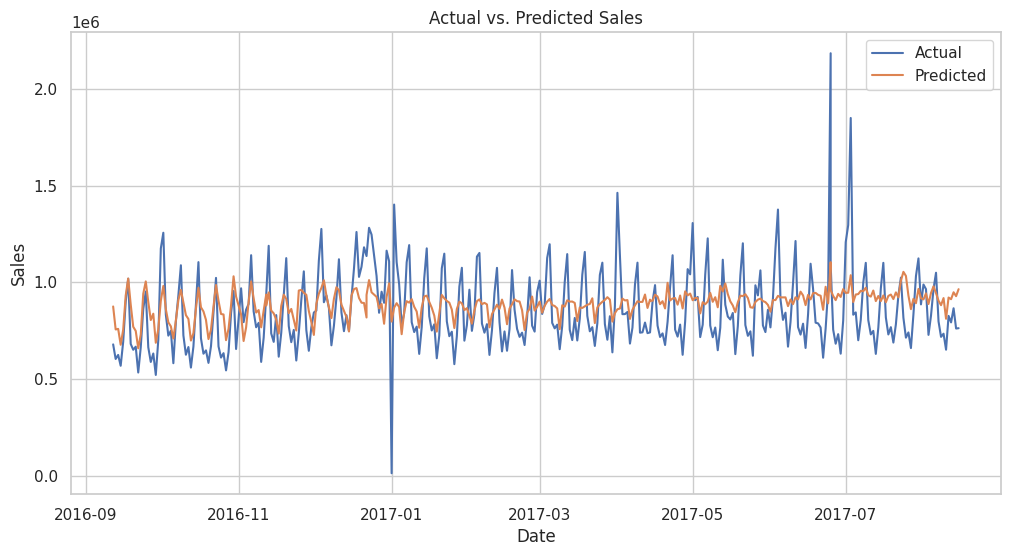

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(test_endog.index, test_endog['sales'], label='Actual')
plt.plot(test_endog.index, SARIMAX_pred.predicted_mean, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [166]:
mse = mean_squared_error(test_endog, SARIMAX_pred.predicted_mean)
msle = mean_squared_log_error(test_endog, SARIMAX_pred.predicted_mean)
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(2)

# Create a DataFrame to store the results
results3 = pd.DataFrame([["SARIMAX", mse, msle, rmse, rmsle]], columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])

# Print the evaluation results
results3

Model           MSE      MSLE       RMSE  RMSLE
0  SARIMAX  3.322329e+10  0.087436  182272.56    0.3

In [167]:
s_train.head()

date  holiday_0  holiday_1  holiday_2  locale  transferred  \
0 2013-01-01          0          0          1     0.0            0   
1 2013-01-02          0          1          0     3.0            0   
2 2013-01-03          0          1          0     3.0            0   
3 2013-01-04          0          1          0     3.0            0   
4 2013-01-05          0          1          1     0.0            0   

           sales  onpromotion  
0    2511.618999          0.0  
1  496092.417944          0.0  
2  361461.231124          0.0  
3  354459.677093          0.0  
4  477350.121229          0.0

In [168]:
s_test.head()

date  holiday_0  holiday_1  holiday_2  locale  transferred  \
0 2016-09-12          0          1          0     3.0            1   
1 2016-09-13          0          1          0     3.0            1   
2 2016-09-14          0          1          0     3.0            1   
3 2016-09-15          0          1          0     3.0            1   
4 2016-09-16          0          1          0     3.0            1   

           sales  onpromotion  
0  678776.459126       5902.0  
1  603427.946974       7836.0  
2  624262.071976      13238.0  
3  568324.812986       8373.0  
4  691912.601466      14453.0

In [169]:
# Rename s_train to m_train
m_train = s_train

# Rename s_test to m_test
m_test = s_test

In [170]:
m_train['year'] = m_train['date'].dt.year
m_train['month'] = m_train['date'].dt.month
m_train['day'] = m_train['date'].dt.day
m_train['day_of_week'] = m_train['date'].dt.dayofweek
m_train['day_of_year'] = m_train['date'].dt.dayofyear
m_train['week_of_year'] = m_train['date'].dt.isocalendar().week
m_train['quarter'] = m_train['date'].dt.quarter
m_train['is_weekend'] = (m_train['date'].dt.dayofweek // 5 == 1).astype(int)
m_train['day_of_month'] = m_train['date'].dt.day


In [171]:
m_test['year'] = m_test['date'].dt.year
m_test['month'] = m_test['date'].dt.month
m_test['day'] = m_test['date'].dt.day
m_test['day_of_week'] = m_test['date'].dt.dayofweek
m_test['day_of_year'] = m_test['date'].dt.dayofyear
m_test['week_of_year'] = m_test['date'].dt.isocalendar().week
m_test['quarter'] = m_test['date'].dt.quarter
m_test['is_weekend'] = (m_test['date'].dt.dayofweek // 5 == 1).astype(int)
m_test['day_of_month'] = m_test['date'].dt.day

In [172]:
m_train.drop(columns=['date'], inplace=True)
m_test.drop(columns=['date'], inplace=True)

In [173]:
m_train.head()

holiday_0  holiday_1  holiday_2  locale  transferred          sales  \
0          0          0          1     0.0            0    2511.618999   
1          0          1          0     3.0            0  496092.417944   
2          0          1          0     3.0            0  361461.231124   
3          0          1          0     3.0            0  354459.677093   
4          0          1          1     0.0            0  477350.121229   

   onpromotion  year  month  day  day_of_week  day_of_year  week_of_year  \
0          0.0  2013      1    1            1            1             1   
1          0.0  2013      1    2            2            2             1   
2          0.0  2013      1    3            3            3             1   
3          0.0  2013      1    4            4            4             1   
4          0.0  2013      1    5            5            5             1   

   quarter  is_weekend  day_of_month  
0        1           0             1  
1        1           0             2  
2        1           0             3  
3        1           0             4  
4        1           1             5

In [174]:
m_test.head()

holiday_0  holiday_1  holiday_2  locale  transferred          sales  \
0          0          1          0     3.0            1  678776.459126   
1          0          1          0     3.0            1  603427.946974   
2          0          1          0     3.0            1  624262.071976   
3          0          1          0     3.0            1  568324.812986   
4          0          1          0     3.0            1  691912.601466   

   onpromotion  year  month  day  day_of_week  day_of_year  week_of_year  \
0       5902.0  2016      9   12            0          256            37   
1       7836.0  2016      9   13            1          257            37   
2      13238.0  2016      9   14            2          258            37   
3       8373.0  2016      9   15            3          259            37   
4      14453.0  2016      9   16            4          260            37   

   quarter  is_weekend  day_of_month  
0        3           0            12  
1        3           0            13  
2        3           0            14  
3        3           0            15  
4        3           0            16

In [175]:
Xm_train= m_train.drop("sales", axis= 1)

ym_train=m_train["sales"]

Xm_test=m_test.drop("sales", axis= 1)

ym_test=m_test["sales"]

LINEAR REGRESSION

In [176]:
lin_model=LinearRegression()

In [177]:
model_lin=lin_model.fit(Xm_train,ym_train)

In [178]:
lin_pred=model_lin.predict(Xm_test)


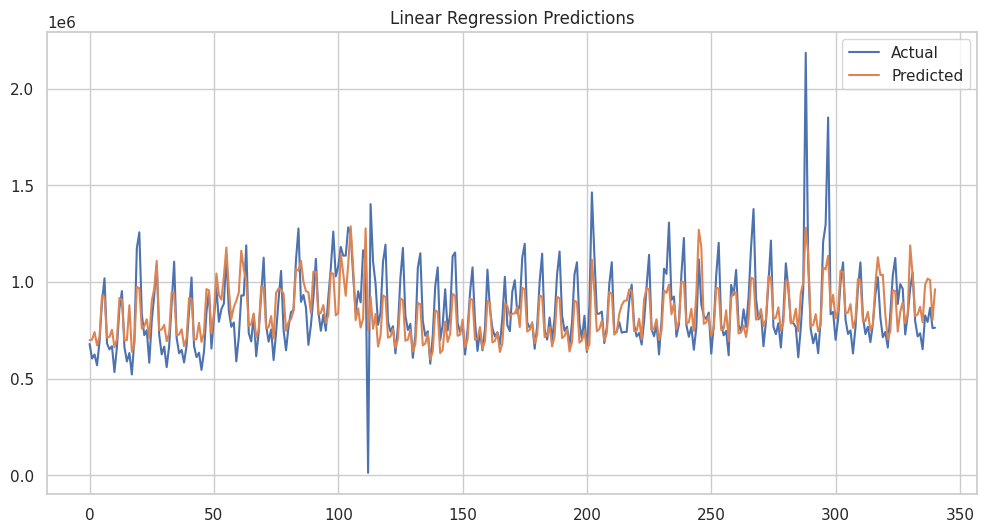

In [179]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(ym_test, label='Actual')
plt.plot(lin_pred, label='Predicted')
plt.title('Linear Regression Predictions')
plt.legend(loc='best')
plt.show()

In [180]:
mse=mean_squared_error(ym_test,lin_pred)
msle=mean_squared_log_error(ym_test,lin_pred)
rmse=np.sqrt(mean_squared_error(ym_test,lin_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,lin_pred)).round(2)

results4=pd.DataFrame([["Linear Regression",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results4

Model           MSE      MSLE      RMSE  RMSLE
0  Linear Regression  2.045192e+10  0.069689  143010.2   0.26

DECISION TREE

In [181]:
decision_tree=DecisionTreeRegressor(random_state=100)

In [182]:
model_dtree=decision_tree.fit(Xm_train,ym_train)

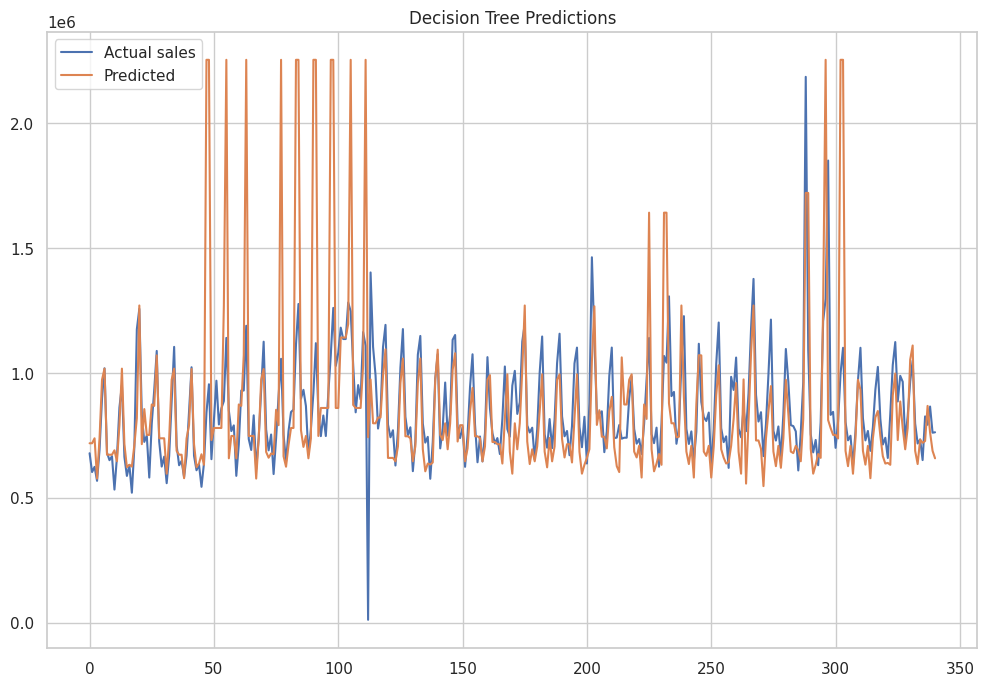

In [183]:
#make predictions
tree_pred=model_dtree.predict(Xm_test)
#visualise our actual and predicted values
plt.figure(figsize=(12,8))
plt.plot(ym_test,label="Actual sales")
plt.plot(tree_pred,label="Predicted")
plt.legend(loc="best")
plt.title("Decision Tree Predictions")
plt.show()

In [184]:
mse=mean_squared_error(ym_test,tree_pred)
msle=mean_squared_log_error(ym_test,tree_pred)
rmse=np.sqrt(mean_squared_error(ym_test,tree_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,tree_pred)).round(2)

results5=pd.DataFrame([["Decision Tree",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results5

Model           MSE      MSLE       RMSE  RMSLE
0  Decision Tree  8.477264e+10  0.096739  291157.41   0.31

RANDOM FOREST REGRESSOR

In [185]:
# Create an instance for the Random Forest model
rf_model = RandomForestRegressor(random_state=100)

In [186]:
# Fit the data on the model
model_rf = rf_model.fit(Xm_train, ym_train)
# Make predictions
rf_pred = model_rf.predict(Xm_test)

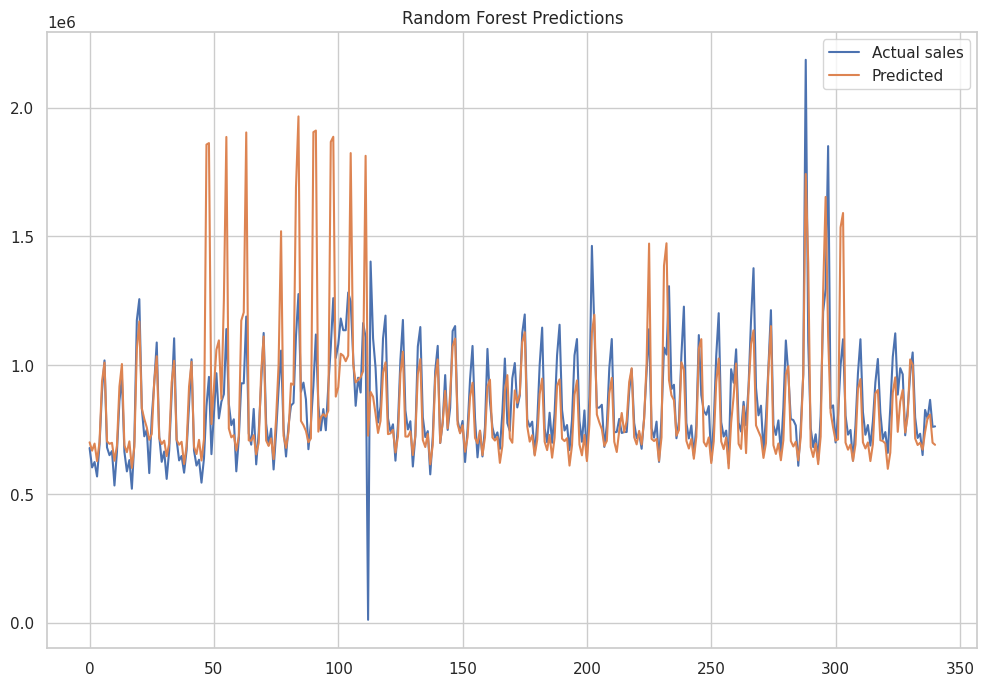

In [187]:
plt.figure(figsize=(12,8))
plt.plot(ym_test,label="Actual sales")
plt.plot(rf_pred,label="Predicted")
plt.legend(loc="best")
plt.title("Random Forest Predictions")
plt.show()

In [188]:
mse=mean_squared_error(ym_test,rf_pred)
msle=mean_squared_log_error(ym_test,rf_pred)
rmse=np.sqrt(mean_squared_error(ym_test,rf_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,rf_pred)).round(2)

results6=pd.DataFrame([["Random Forest",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results6


Model           MSE      MSLE       RMSE  RMSLE
0  Random Forest  3.753159e+10  0.073642  193730.71   0.27

In [189]:
# Combine the results DataFrames into a single table
combined = pd.concat([results, results1, results2,results3,results4,results5,results6])

# Reset the index
combined = combined.reset_index(drop=True)

# Sort the combined results table
combined = combined.sort_values(by="RMSLE")

# Display the combined results table
combined

Model           MSE      MSLE       RMSE  RMSLE
4  Linear Regression  2.045192e+10  0.069689  143010.20   0.26
6      Random Forest  3.753159e+10  0.073642  193730.71   0.27
2             SARIMA  2.344989e+10  0.083395  153133.55   0.29
1              ARIMA  2.908160e+10  0.087933  170533.27   0.30
3            SARIMAX  3.322329e+10  0.087436  182272.56   0.30
5      Decision Tree  8.477264e+10  0.096739  291157.41   0.31
0                 AR  8.542853e+10  0.174035  292281.60   0.42

In [190]:
# Get our features from our train data
feature_names = Xm_train.columns

In [191]:
feature_importance = model_lin.coef_
#view feature importance
feature_importance

array([ 4.00218854e+04, -9.69193218e+04, -7.54926849e+04, -5.73363048e+02,
       -1.27730254e+05,  1.04985484e+01,  1.10890417e+05, -1.20708913e+04,
       -1.86600781e+03, -1.53293210e+04,  1.35668233e+03, -1.88614562e+03,
       -1.20180561e+04,  2.80464785e+05, -1.86600781e+03])

In [192]:
 #we calculate the absolute value of the fearure importance and sort in descending order
absolute_importance = np.abs(feature_importance)
sorted_importance = sorted(absolute_importance, reverse=True)


In [193]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': sorted_importance})
importance_df

Feature     Importance
0      holiday_0  280464.784638
1      holiday_1  127730.253832
2      holiday_2  110890.416541
3         locale   96919.321829
4    transferred   75492.684939
5    onpromotion   40021.885443
6           year   15329.320991
7          month   12070.891272
8            day   12018.056117
9    day_of_week    1886.145619
10   day_of_year    1866.007806
11  week_of_year    1866.007806
12       quarter    1356.682325
13    is_weekend     573.363048
14  day_of_month      10.498548

In [194]:
fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance in Linear Regression Model')
fig.update_xaxes(categoryorder='total descending')  # Sort x-axis by importance

# Show the plot
fig.show()

In [195]:
## dropping our unwanted features
lin_X_train= Xm_train.drop( ["is_weekend","day_of_month"], axis= 1)

lin_X_test= Xm_test.drop(["is_weekend","day_of_month"], axis= 1)

In [196]:
lin_model1=LinearRegression()
lin_reg=lin_model1.fit(lin_X_train, ym_train)

In [197]:
#we predict
lin_reg_pred=lin_reg.predict(lin_X_test)


In [198]:
mse=mean_squared_error(ym_test,lin_reg_pred)
msle=mean_squared_log_error(ym_test,lin_reg_pred)
rmse=np.sqrt(mean_squared_error(ym_test,lin_reg_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,lin_reg_pred)).round(2)

results7=pd.DataFrame([["FS Linear Regression",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results7

Model           MSE     MSLE       RMSE  RMSLE
0  FS Linear Regression  3.388663e+10  0.08625  184083.23   0.29

In [199]:
# Get feature importances
feature_importance1 = model_dtree.feature_importances_

In [200]:
#Create a DataFrame to store feature names and their importances
importance_df1 = pd.DataFrame({'Feature': Xm_train.columns, 'Importance': feature_importance1})
# Sort the DataFrame by importance in descending order
importance_df1 = importance_df1.sort_values(by='Importance', ascending=False)
#view important features
importance_df1

Feature  Importance
5    onpromotion    0.513571
9    day_of_week    0.188548
10   day_of_year    0.075224
13    is_weekend    0.054667
14  day_of_month    0.045173
6           year    0.044447
11  week_of_year    0.023543
7          month    0.023293
8            day    0.013432
0      holiday_0    0.005118
1      holiday_1    0.004034
3         locale    0.003218
12       quarter    0.003154
2      holiday_2    0.002579
4    transferred    0.000001

In [201]:
fig = px.bar(importance_df1, x='Feature', y='Importance', title='Feature Importances in Decision Tree Model')

# Customize the layout (optional)
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.update_xaxes(categoryorder='total descending')  # Sort x-axis by importance

# Show the plot
fig.show()

In [202]:
tree_X_train= Xm_train.drop(["transferred"], axis= 1)

tree_X_test= Xm_test.drop(["transferred"], axis= 1)

In [203]:
decision_tree1=DecisionTreeRegressor(random_state=100)
tree_m=decision_tree1.fit(tree_X_train, ym_train)
#we predict
tree_p=tree_m.predict(tree_X_test)

In [204]:
mse=mean_squared_error(ym_test,tree_p)
msle=mean_squared_log_error(ym_test,tree_p)
rmse=np.sqrt(mean_squared_error(ym_test,tree_p)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,tree_p)).round(2)

results8=pd.DataFrame([["FS Decision Tree",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results8


Model           MSE      MSLE       RMSE  RMSLE
0  FS Decision Tree  4.721563e+10  0.083162  217291.57   0.29

In [205]:
# Get feature importances
feature_importance2= rf_model.feature_importances_
#Create a DataFrame to store feature names and their importances
importance_df2 = pd.DataFrame({'Feature': Xm_train.columns, 'Importance': feature_importance2})
# Sort the DataFrame by importance in descending order
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)
#view important features
importance_df2

Feature  Importance
5    onpromotion    0.507640
9    day_of_week    0.173670
10   day_of_year    0.078348
13    is_weekend    0.073294
6           year    0.041919
11  week_of_year    0.030195
8            day    0.029605
14  day_of_month    0.027240
7          month    0.015222
3         locale    0.009076
0      holiday_0    0.004736
1      holiday_1    0.003318
2      holiday_2    0.003050
12       quarter    0.002664
4    transferred    0.000023

In [206]:



fig = px.bar(importance_df2, x='Feature', y='Importance', title='Feature Importances in Random Forest Model')

# Customize the layout
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.update_xaxes(categoryorder='total descending')  # Sort x-axis by importance

# Show the plot
fig.show()

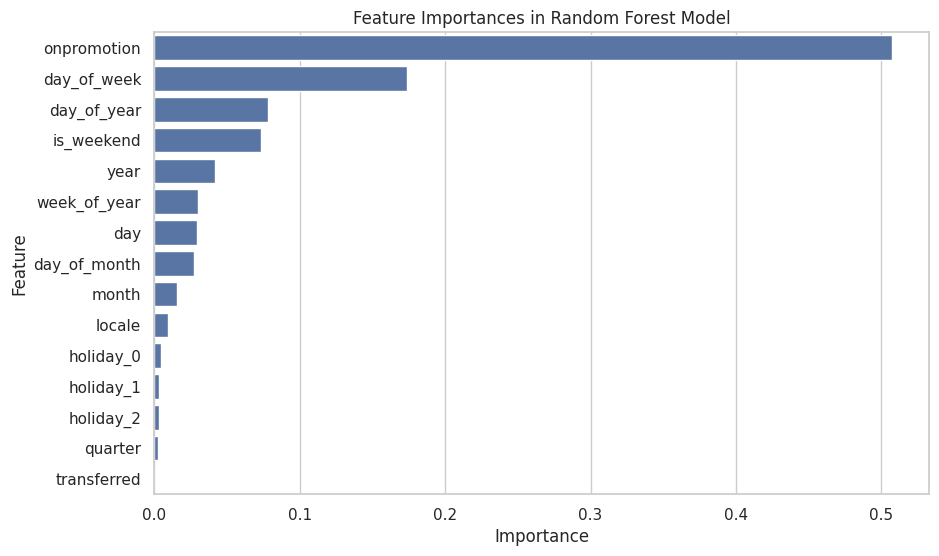

In [207]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df2, orient='h')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()


In [208]:
## dropping our unwanted features
forest_X_train= Xm_train.drop(["transferred"], axis= 1)

forest_X_test= Xm_test.drop(["transferred"], axis= 1)
#fit our model
rf_model1 = RandomForestRegressor(random_state=100)
forest_m=rf_model1.fit(forest_X_train, ym_train)
#we predict
forest_pred=forest_m.predict(forest_X_test)

In [209]:
mse=mean_squared_error(ym_test,forest_pred)
msle=mean_squared_log_error(ym_test,forest_pred)
rmse=np.sqrt(mean_squared_error(ym_test,forest_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error(ym_test,forest_pred)).round(2)

results9=pd.DataFrame([["FS Random Forest",mse,msle,rmse,rmsle]],columns=["Model","MSE","MSLE","RMSE","RMSLE"])
results9

Model           MSE      MSLE       RMSE  RMSLE
0  FS Random Forest  3.780949e+10  0.074052  194446.62   0.27

In [210]:
final_result= pd.concat([results, results1,results2,results3,results4,results5,results6,results7,results8,results9])
final_result = final_result.sort_values(by= "RMSLE")
#view model perfromances
final_result

Model           MSE      MSLE       RMSE  RMSLE
0     Linear Regression  2.045192e+10  0.069689  143010.20   0.26
0         Random Forest  3.753159e+10  0.073642  193730.71   0.27
0      FS Random Forest  3.780949e+10  0.074052  194446.62   0.27
0                SARIMA  2.344989e+10  0.083395  153133.55   0.29
0  FS Linear Regression  3.388663e+10  0.086250  184083.23   0.29
0      FS Decision Tree  4.721563e+10  0.083162  217291.57   0.29
0                 ARIMA  2.908160e+10  0.087933  170533.27   0.30
0               SARIMAX  3.322329e+10  0.087436  182272.56   0.30
0         Decision Tree  8.477264e+10  0.096739  291157.41   0.31
0                    AR  8.542853e+10  0.174035  292281.60   0.42

In [211]:
# Define the date range
start_date = pd.to_datetime('2017-08-16')
end_date = pd.to_datetime('2017-08-31')

# Filter the 'holidays_events' dataset to include only dates within the specified range
filtered_holidays = holidays_events[(holidays_events['date'] >= start_date) & (holidays_events['date'] <= end_date)]

# Merge 'test' with the filtered 'holidays_events' dataset based on the 'date' column
merged_test = pd.merge(test, filtered_holidays, how='left', on='date')

In [212]:
#view data
merged_test.head()

id       date  store_nbr      family  onpromotion type locale  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  NaN    NaN   
1  3000889 2017-08-16          1   BABY CARE            0  NaN    NaN   
2  3000890 2017-08-16          1      BEAUTY            2  NaN    NaN   
3  3000891 2017-08-16          1   BEVERAGES           20  NaN    NaN   
4  3000892 2017-08-16          1       BOOKS            0  NaN    NaN   

  locale_name description transferred  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN

In [213]:
#drop columns like we did for the train
final_merge_test=merged_test.drop(["family","id","store_nbr","locale_name","description"],axis=1)
#view after dropping
final_merge_test.head()

date  onpromotion type locale transferred
0 2017-08-16            0  NaN    NaN         NaN
1 2017-08-16            0  NaN    NaN         NaN
2 2017-08-16            2  NaN    NaN         NaN
3 2017-08-16           20  NaN    NaN         NaN
4 2017-08-16            0  NaN    NaN         NaN

In [214]:
#check number of missing values
final_merge_test.isnull().sum()

date               0
onpromotion        0
type           26730
locale         26730
transferred    26730
dtype: int64

In [215]:
#fill missing values
final_merge_test["type"]=final_merge_test["type"].replace(np.nan, "Not Holiday")

final_merge_test["locale"]=final_merge_test["locale"].replace(np.nan, "Not Holiday")

final_merge_test["transferred"]=final_merge_test["transferred"].replace(np.nan, True)
#check changes made
final_merge_test.isnull().sum()


<ipython-input-215-f6c062cf5e51>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



date           0
onpromotion    0
type           0
locale         0
transferred    0
dtype: int64

In [216]:
final_merge_test= final_merge_test.rename(columns= {"type":"holiday"})

In [217]:
#we encode our categorical columns as we did on our train dataset

#we encode transferred using label encoder
final_merge_test["transferred"]=LE.transform(final_merge_test["transferred"])

#we the encode holiday with binary encoder
final_merge_test= BE.transform(final_merge_test)

# encode the locale column using the same encoder as train
final_merge_test[["locale"]] = OE.transform(final_merge_test[["locale"]])

In [218]:
final_merge_test.head()

date  onpromotion  holiday_0  holiday_1  holiday_2  locale  \
0 2017-08-16            0          0          1          0     3.0   
1 2017-08-16            0          0          1          0     3.0   
2 2017-08-16            2          0          1          0     3.0   
3 2017-08-16           20          0          1          0     3.0   
4 2017-08-16            0          0          1          0     3.0   

   transferred  
0            1  
1            1  
2            1  
3            1  
4            1

In [219]:
# Add the features to final_merge_test
final_merge_test['year'] = final_merge_test['date'].dt.year
final_merge_test['month'] = final_merge_test['date'].dt.month
final_merge_test['day'] = final_merge_test['date'].dt.day
final_merge_test['day_of_week'] = final_merge_test['date'].dt.dayofweek
final_merge_test['day_of_year'] = final_merge_test['date'].dt.dayofyear
final_merge_test['week_of_year'] = final_merge_test['date'].dt.isocalendar().week
final_merge_test['quarter'] = final_merge_test['date'].dt.quarter
final_merge_test['is_weekend'] = (final_merge_test['date'].dt.dayofweek // 5 == 1).astype(int)
final_merge_test['day_of_month'] = final_merge_test['date'].dt.day
#we drop the date since our best model is a linear regression model
final_merge_test=final_merge_test.drop(["date"],axis=1)
#view changes
final_merge_test.head()

onpromotion  holiday_0  holiday_1  holiday_2  locale  transferred  year  \
0            0          0          1          0     3.0            1  2017   
1            0          0          1          0     3.0            1  2017   
2            2          0          1          0     3.0            1  2017   
3           20          0          1          0     3.0            1  2017   
4            0          0          1          0     3.0            1  2017   

   month  day  day_of_week  day_of_year  week_of_year  quarter  is_weekend  \
0      8   16            2          228            33        3           0   
1      8   16            2          228            33        3           0   
2      8   16            2          228            33        3           0   
3      8   16            2          228            33        3           0   
4      8   16            2          228            33        3           0   

   day_of_month  
0            16  
1            16  
2            16  
3            16  
4            16

In [220]:
#Get the feature names used during training
feature_names_training = model_lin.feature_names_in_

# Reorder the columns in final_merge_test to match the feature order of the train
final_merge_test = final_merge_test[feature_names_training]
#view to see changes
final_merge_test.head()

holiday_0  holiday_1  holiday_2  locale  transferred  onpromotion  year  \
0          0          1          0     3.0            1            0  2017   
1          0          1          0     3.0            1            0  2017   
2          0          1          0     3.0            1            2  2017   
3          0          1          0     3.0            1           20  2017   
4          0          1          0     3.0            1            0  2017   

   month  day  day_of_week  day_of_year  week_of_year  quarter  is_weekend  \
0      8   16            2          228            33        3           0   
1      8   16            2          228            33        3           0   
2      8   16            2          228            33        3           0   
3      8   16            2          228            33        3           0   
4      8   16            2          228            33        3           0   

   day_of_month  
0            16  
1            16  
2            16  
3            16  
4            16

In [221]:
final_pre=model_lin.predict(final_merge_test)

In [222]:
result_df = pd.DataFrame(final_pre, columns=["sales"])

In [223]:
result_df

sales
0      683486.982791
1      683486.982791
2      683507.979888
3      683696.953759
4      683486.982791
5      683612.965372
6      683486.982791
7      683749.446501
8      683959.417470
9      683675.956662
10     683497.481339
11     683497.481339
12     684158.889890
13     683486.982791
14     683486.982791
15     683507.979888
16     683549.974081
17     683486.982791
18     683591.968275
19     683486.982791
20     683654.959566
21     683539.475533
22     683581.469727
23     683486.982791
24     683486.982791
25     683675.956662
26     683486.982791
27     683486.982791
28     683486.982791
29     683486.982791
30     686174.611186
31     683633.962469
32     683486.982791
33     683486.982791
34     683486.982791
35     683507.979888
36     683938.420373
37     683486.982791
38     683644.461017
39     683486.982791
40     683801.939243
41     684599.828923
42     683675.956662
43     683497.481339
44     683497.481339
45     684494.843439
46     683486.982791
47     683486.982791
48     683507.979888
49     683549.974081
50     683486.982791
51     683644.461017
52     683486.982791
53     683654.959566
54     683539.475533
55     683591.968275
56     683486.982791
57     683486.982791
58     683686.455211
59     683486.982791
60     683486.982791
61     683486.982791
62     683486.982791
63     685901.648927
64     683633.962469
65     683486.982791
66     683486.982791
67     683486.982791
68     683507.979888
69     684032.907309
70     683486.982791
71     683654.959566
72     683486.982791
73     683854.431985
74     685009.272312
75     683675.956662
76     683497.481339
77     683497.481339
78     684557.834730
79     683486.982791
80     683486.982791
81     683528.976985
82     683549.974081
83     683486.982791
84     683633.962469
85     683486.982791
86     683654.959566
87     683518.478436
88     683570.971178
89     683486.982791
90     683486.982791
91     683675.956662
92     683486.982791
93     683497.481339
94     683486.982791
95     683486.982791
96     685198.246183
97     683633.962469
98     683486.982791
99     683486.982791
100    683486.982791
101    683507.979888
102    683885.927631
103    683486.982791
104    683665.458114
105    683486.982791
106    683791.440695
107    684694.315859
108    683675.956662
109    683497.481339
110    683497.481339
111    684400.356503
112    683486.982791
113    683486.982791
114    683507.979888
115    683549.974081
116    683486.982791
117    683644.461017
118    683486.982791
119    683654.959566
120    683539.475533
121    683581.469727
122    683486.982791
123    683486.982791
124    683644.461017
125    683486.982791
126    683486.982791
127    683497.481339
128    683486.982791
129    685786.164895
130    683633.962469
131    683486.982791
132    683486.982791
133    683486.982791
134    683507.979888
135    683833.434889
136    683486.982791
137    683654.959566
138    683486.982791
139    683791.440695
140    684610.327472
141    683675.956662
142    683497.481339
143    683497.481339
144    684431.852149
145    683486.982791
146    683486.982791
147    683507.979888
148    683549.974081
149    683486.982791
150    683633.962469
151    683486.982791
152    683654.959566
153    683518.478436
154    683591.968275
155    683486.982791
156    683486.982791
157    683696.953759
158    683486.982791
159    683486.982791
160    683486.982791
161    683486.982791
162    686048.628605
163    683633.962469
164    683486.982791
165    683486.982791
166    683486.982791
167    683507.979888
168    683885.927631
169    683486.982791
170    683644.461017
171    683486.982791
172    683812.437792
173    684683.817311
174    683675.956662
175    683497.481339
176    683497.481339
177    684410.855052
178    683486.982791
179    683486.982791
180    683507.979888
181    683549.974081
182    683486.982791
183    683633.962469
184    683486.982791
185    683654.959566
186    683528.976985
187    683581.469727
188    683486.982791
189    683486.982791
190 

In [224]:
# Define the columns to drop from the 'test' DataFrame
columns_to_drop = ['date', 'store_nbr', 'family', 'onpromotion']
# Create a new DataFrame with the specified columns dropped
test_without_columns = test.drop(columns=columns_to_drop)

# Concatenate the modified 'test' DataFrame with 'result_df'
final_test_with_sales = pd.concat([test_without_columns, result_df], axis=1)

In [225]:
#After concatenating with the original we put it csv
final_test_with_sales.to_csv("final_test_with_sales.csv", index=False)

In [226]:


# model_file_path = '/Users/anushkatelang/Desktop/minorproject/model.pkl'
# joblib.dump(model_lin, model_file_path)


In [227]:
import sklearn
import joblib

In [228]:

# Get the scikit-learn version
sklearn_version = sklearn.__version__

# Create a string containing the package names and versions
requirements = f"scikit-learn=={sklearn_version}\n"
requirements += "\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m, "__version__", None))

# Export the requirements to 'requirements.txt'
with open("requirements.txt", "w") as f:
    f.write(requirements)

In [229]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders.binary import BinaryEncoder

# # Assuming LE, BE, OE are previously defined
# LE = LabelEncoder()
# BE = BinaryEncoder()  # Assuming you have defined BinaryEncoder elsewhere
# OE = OrdinalEncoder()

# Save the encoders to files
joblib.dump(LE, 'label_encoder1.pkl')
joblib.dump(BE, 'binary_encoder1.pkl')
joblib.dump(OE, 'ordinal_encoder1.pkl')


['ordinal_encoder1.pkl']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a su

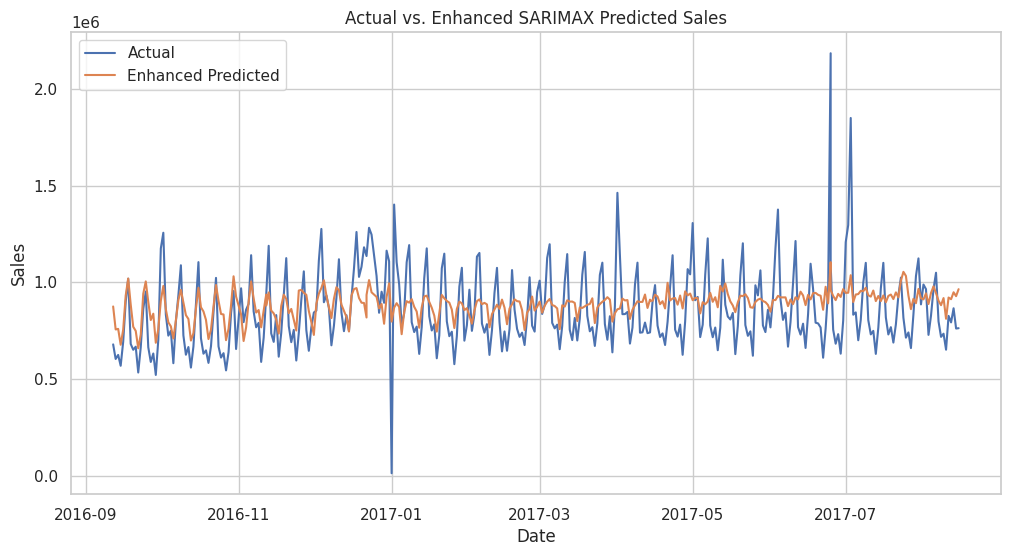

In [230]:
model4_enhanced = sm.tsa.SARIMAX(train_endog, exog=train_exog, order=(6, 1, 7), seasonal_order=(1, 1, 1, 12)).fit()
SARIMAX_pred_enhanced = model4_enhanced.get_forecast(steps=len(test_endog), exog=test_exog)

# Plot actual vs. enhanced SARIMAX predictions
plt.figure(figsize=(12, 6))
plt.plot(test_endog.index, test_endog['sales'], label='Actual')
plt.plot(test_endog.index, SARIMAX_pred_enhanced.predicted_mean, label='Enhanced Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Enhanced SARIMAX Predicted Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Evaluate the enhanced SARIMAX model
mse = mean_squared_error(test_endog, SARIMAX_pred_enhanced.predicted_mean)
msle = mean_squared_log_error(test_endog, SARIMAX_pred_enhanced.predicted_mean)
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(2)

# Add results to DataFrame
results_enhanced_sarimax = pd.DataFrame([["Enhanced SARIMAX", mse, msle, rmse, rmsle]],
                                        columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scale the features for DNN
scaler = MinMaxScaler()
Xm_train_scaled = scaler.fit_transform(Xm_train)
Xm_test_scaled = scaler.transform(Xm_test)

# Build a simple DNN model
dnn_model = Sequential([
    Dense(128, input_dim=Xm_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Single output node for regression
])

dnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_logarithmic_error'])
dnn_model.fit(Xm_train_scaled, ym_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Predict with DNN model
dnn_pred = dnn_model.predict(Xm_test_scaled)

# Evaluate the DNN model
mse_dnn = mean_squared_error(ym_test, dnn_pred)
msle_dnn = mean_squared_log_error(ym_test, dnn_pred)
rmse_dnn = np.sqrt(mse_dnn).round(2)
rmsle_dnn = np.sqrt(msle_dnn).round(2)

results_dnn = pd.DataFrame([["DNN", mse_dnn, msle_dnn, rmse_dnn, rmsle_dnn]],
                           columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 331154423808.0000 - mean_squared_logarithmic_error: 159.8455 - val_loss: 681958440960.0000 - val_mean_squared_logarithmic_error: 137.0007
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 329448652800.0000 - mean_squared_logarithmic_error: 118.2181 - val_loss: 681909747712.0000 - val_mean_squared_logarithmic_error: 99.4994
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 333601144832.0000 - mean_squared_logarithmic_error: 85.4036 - val_loss: 681727361024.0000 - val_mean_squared_logarithmic_error: 73.4227
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 326439960576.0000 - mean_squared_logarithmic_error: 63.0001 - val_loss: 681290629120.0000 - val_mean_squared_logarithmic_error: 56.8196
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325469863936.0000 - mean_squared_logarithmic_error: 48.5961 - val_loss: 680457273344.0000 - val_mean_squared_logarithmic_error: 45.3914
Epoch 6/50
35/35 ━━━━━━━━━

In [232]:
final_result = pd.concat([final_result, results_enhanced_sarimax, results_dnn])
final_result = final_result.sort_values(by="RMSLE").reset_index(drop=True)

# Display final combined results
print(final_result)

                   Model           MSE      MSLE       RMSE  RMSLE
0      Linear Regression  2.045192e+10  0.069689  143010.20   0.26
1          Random Forest  3.753159e+10  0.073642  193730.71   0.27
2       FS Random Forest  3.780949e+10  0.074052  194446.62   0.27
3                 SARIMA  2.344989e+10  0.083395  153133.55   0.29
4   FS Linear Regression  3.388663e+10  0.086250  184083.23   0.29
5       FS Decision Tree  4.721563e+10  0.083162  217291.57   0.29
6                  ARIMA  2.908160e+10  0.087933  170533.27   0.30
7                SARIMAX  3.322329e+10  0.087436  182272.56   0.30
8       Enhanced SARIMAX  3.322329e+10  0.087436  182272.56   0.30
9          Decision Tree  8.477264e+10  0.096739  291157.41   0.31
10                    AR  8.542853e+10  0.174035  292281.60   0.42
11                   DNN  1.028962e+11  0.208705  320774.43   0.46


In [237]:
# Import necessary libraries for DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

# Create a function to generate sample weights
def calculate_sample_weights(y):
    return 1 / (y + 1)

# Generate sample weights for training data
sample_weights = calculate_sample_weights(ym_train)

# Build the DNN model
dnn_model = Sequential([
    Dense(128, input_dim=Xm_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the model with Adam optimizer and mean squared error loss
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model with sample weights
history = dnn_model.fit(Xm_train, ym_train, epochs=100, batch_size=32, sample_weight=sample_weights, validation_split=0.2, verbose=2)

# Predict and evaluate
dnn_pred_weighted = dnn_model.predict(Xm_test).flatten()

mse_dnn_weighted = mean_squared_error(ym_test, dnn_pred_weighted)
msle_dnn_weighted = mean_squared_log_error(ym_test, dnn_pred_weighted)
rmse_dnn_weighted = np.sqrt(mse_dnn_weighted).round(2)
rmsle_dnn_weighted = np.sqrt(msle_dnn_weighted).round(2)

# Store the DNN results
results_dnn_weighted = pd.DataFrame([["Weighted DNN", mse_dnn_weighted, msle_dnn_weighted, rmse_dnn_weighted, rmsle_dnn_weighted]],
                                    columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])

# Print results
print(results_dnn_weighted)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 - 2s - 45ms/step - loss: 534463.9375 - val_loss: 770763.8125
Epoch 2/100
35/35 - 0s - 5ms/step - loss: 514118.1250 - val_loss: 685928.7500
Epoch 3/100
35/35 - 0s - 9ms/step - loss: 457626.1250 - val_loss: 487771.0000
Epoch 4/100
35/35 - 0s - 8ms/step - loss: 347327.7500 - val_loss: 225731.7500
Epoch 5/100
35/35 - 0s - 9ms/step - loss: 220143.0938 - val_loss: 141110.3125
Epoch 6/100
35/35 - 0s - 9ms/step - loss: 154362.5156 - val_loss: 226247.9844
Epoch 7/100
35/35 - 0s - 6ms/step - loss: 129148.1094 - val_loss: 245669.8281
Epoch 8/100
35/35 - 0s - 9ms/step - loss: 133881.2656 - val_loss: 218224.8281
Epoch 9/100
35/35 - 0s - 10ms/step - loss: 134258.0469 - val_loss: 203070.2344
Epoch 10/100
35/35 - 0s - 7ms/step - loss: 116701.0703 - val_loss: 181786.4688
Epoch 11/100
35/35 - 0s - 10ms/step - loss: 126767.4453 - val_loss: 162779.8750
Epoch 12/100
35/35 - 0s - 5ms/step - loss: 116561.3516 - val_loss: 154918.4688
Epoch 13/100
35/35 - 0s - 4ms/step - loss: 104855.3594 - val_loss: 158

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
35/35 - 2s - 57ms/step - loss: 534306.2500 - val_loss: 764935.0625
Epoch 2/100
35/35 - 0s - 5ms/step - loss: 512195.0625 - val_loss: 662790.7500
Epoch 3/100
35/35 - 0s - 3ms/step - loss: 449984.5625 - val_loss: 436320.1875
Epoch 4/100
35/35 - 0s - 4ms/step - loss: 329690.8438 - val_loss: 183559.9688
Epoch 5/100
35/35 - 0s - 3ms/step - loss: 203084.6875 - val_loss: 172711.7500
Epoch 6/100
35/35 - 0s - 4ms/step - loss: 145814.3594 - val_loss: 271118.7188
Epoch 7/100
35/35 - 0s - 4ms/step - loss: 126070.6406 - val_loss: 273112.2500
Epoch 8/100
35/35 - 0s - 4ms/step - loss: 134175.4062 - val_loss: 223813.1250
Epoch 9/100
35/35 - 0s - 4ms/step - loss: 119776.4844 - val_loss: 206272.9844
Epoch 10/100
35/35 - 0s - 4ms/step - loss: 113926.2266 - val_loss: 184602.6875
Epoch 11/100
35/35 - 0s - 4ms/step - loss: 108541.3203 - val_loss: 161868.8281
Epoch 12/100
35/35 - 0s - 4ms/step - loss: 116863.3047 - val_loss: 155803.0156
Epoch 13/100
35/35 - 0s - 4ms/step - loss: 117811.9375 - val

In [238]:
final_result = pd.concat([final_result, results_enhanced_sarimax, results_dnn_weighted])
final_result = final_result.sort_values(by="RMSLE").reset_index(drop=True)

# Display the final combined results
print(final_result)

                   Model           MSE      MSLE       RMSE  RMSLE
0      Linear Regression  2.045192e+10  0.069689  143010.20   0.26
1          Random Forest  3.753159e+10  0.073642  193730.71   0.27
2       FS Random Forest  3.780949e+10  0.074052  194446.62   0.27
3                 SARIMA  2.344989e+10  0.083395  153133.55   0.29
4   FS Linear Regression  3.388663e+10  0.086250  184083.23   0.29
5       FS Decision Tree  4.721563e+10  0.083162  217291.57   0.29
6                  ARIMA  2.908160e+10  0.087933  170533.27   0.30
7                SARIMAX  3.322329e+10  0.087436  182272.56   0.30
8       Enhanced SARIMAX  3.322329e+10  0.087436  182272.56   0.30
9       Enhanced SARIMAX  3.322329e+10  0.087436  182272.56   0.30
10         Decision Tree  8.477264e+10  0.096739  291157.41   0.31
11          Weighted DNN  8.714570e+10  0.127699  295204.51   0.36
12                    AR  8.542853e+10  0.174035  292281.60   0.42
13                   DNN  1.028962e+11  0.208705  320774.43   

In [239]:
# Import necessary libraries for RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler

# Scale the features for the RNN model
scaler = MinMaxScaler()
Xm_train_scaled = scaler.fit_transform(Xm_train)
Xm_test_scaled = scaler.transform(Xm_test)

# Reshape the data to be compatible with RNN input (samples, timesteps, features)
Xm_train_rnn = Xm_train_scaled.reshape((Xm_train_scaled.shape[0], 1, Xm_train_scaled.shape[1]))
Xm_test_rnn = Xm_test_scaled.reshape((Xm_test_scaled.shape[0], 1, Xm_test_scaled.shape[1]))

# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(Xm_train_rnn.shape[1], Xm_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.3),
    SimpleRNN(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the RNN model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the RNN model
history_rnn = rnn_model.fit(Xm_train_rnn, ym_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Predict and evaluate
rnn_pred = rnn_model.predict(Xm_test_rnn).flatten()

# Calculate evaluation metrics
mse_rnn = mean_squared_error(ym_test, rnn_pred)
msle_rnn = mean_squared_log_error(ym_test, rnn_pred)
rmse_rnn = np.sqrt(mse_rnn).round(2)
rmsle_rnn = np.sqrt(msle_rnn).round(2)

# Store the RNN results
results_rnn = pd.DataFrame([["RNN", mse_rnn, msle_rnn, rmse_rnn, rmsle_rnn]], columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])

# Print results
print(results_rnn)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 - 3s - 85ms/step - loss: 330206707712.0000 - val_loss: 681962504192.0000
Epoch 2/100
35/35 - 0s - 8ms/step - loss: 330200285184.0000 - val_loss: 681944678400.0000
Epoch 3/100
35/35 - 0s - 4ms/step - loss: 330177216512.0000 - val_loss: 681884909568.0000
Epoch 4/100
35/35 - 0s - 4ms/step - loss: 330113941504.0000 - val_loss: 681744400384.0000
Epoch 5/100
35/35 - 0s - 4ms/step - loss: 329987686400.0000 - val_loss: 681490448384.0000
Epoch 6/100
35/35 - 0s - 8ms/step - loss: 329780264960.0000 - val_loss: 681085304832.0000
Epoch 7/100
35/35 - 0s - 8ms/step - loss: 329458679808.0000 - val_loss: 680495153152.0000
Epoch 8/100
35/35 - 0s - 4ms/step - loss: 328997961728.0000 - val_loss: 679680409600.0000
Epoch 9/100
35/35 - 0s - 9ms/step - loss: 328382611456.0000 - val_loss: 678617153536.0000
Epoch 10/100
35/35 - 0s - 4ms/step - loss: 327619543040.0000 - val_loss: 677293391872.0000
Epoch 11/100
35/35 - 0s - 9ms/step - loss: 326616711168.0000 - val_loss: 675667116032.0000
Epoch 12/100
35/35 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 - 3s - 90ms/step - loss: 330207657984.0000 - val_loss: 681964208128.0000
Epoch 2/100
35/35 - 0s - 4ms/step - loss: 330203955200.0000 - val_loss: 681952804864.0000
Epoch 3/100
35/35 - 0s - 8ms/step - loss: 330189799424.0000 - val_loss: 681915514880.0000
Epoch 4/100
35/35 - 0s - 6ms/step - loss: 330151460864.0000 - val_loss: 681828286464.0000
Epoch 5/100
35/35 - 0s - 9ms/step - loss: 330070589440.0000 - val_loss: 681665167360.0000
Epoch 6/100
35/35 - 0s - 7ms/step - loss: 329933881344.0000 - val_loss: 681398239232.0000
Epoch 7/100
35/35 - 0s - 9ms/step - loss: 329714434048.0000 - val_loss: 681002008576.0000
Epoch 8/100
35/35 - 0s - 6ms/step - loss: 329408512000.0000 - val_loss: 680468414464.0000
Epoch 9/100
35/35 - 0s - 6ms/step - loss: 329015492608.0000 - val_loss: 679774781440.0000
Epoch 10/100
35/35 - 0s - 6ms/step - loss: 328508178432.0000 - val_loss: 678895747072.0000
Epoch 11/100
35/35 - 0s - 8ms/step - loss: 327864549376.0000 - val_loss: 677798477824.0000
Epoch 12/100
35/35 

In [240]:
# Combine the new RNN results with existing results
final_result = pd.concat([final_result, results_rnn])
final_result = final_result.sort_values(by="RMSLE").reset_index(drop=True)

# Display the final combined results
print(final_result)

                   Model           MSE      MSLE       RMSE  RMSLE
0      Linear Regression  2.045192e+10  0.069689  143010.20   0.26
1          Random Forest  3.753159e+10  0.073642  193730.71   0.27
2       FS Random Forest  3.780949e+10  0.074052  194446.62   0.27
3                 SARIMA  2.344989e+10  0.083395  153133.55   0.29
4   FS Linear Regression  3.388663e+10  0.086250  184083.23   0.29
5       FS Decision Tree  4.721563e+10  0.083162  217291.57   0.29
6                  ARIMA  2.908160e+10  0.087933  170533.27   0.30
7                SARIMAX  3.322329e+10  0.087436  182272.56   0.30
8       Enhanced SARIMAX  3.322329e+10  0.087436  182272.56   0.30
9       Enhanced SARIMAX  3.322329e+10  0.087436  182272.56   0.30
10         Decision Tree  8.477264e+10  0.096739  291157.41   0.31
11          Weighted DNN  8.714570e+10  0.127699  295204.51   0.36
12                    AR  8.542853e+10  0.174035  292281.60   0.42
13                   RNN  8.829001e+10  0.177842  297136.34   

In [244]:
from sklearn.preprocessing import MinMaxScaler

# Copy of the original training and testing dataframes
dnn_train = m_train.copy()
dnn_test = m_test.copy()

# Apply feature scaling to the dataset
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data
Xm_train_scaled = scaler_X.fit_transform(dnn_train.drop("sales", axis=1))
ym_train_scaled = scaler_y.fit_transform(dnn_train["sales"].values.reshape(-1, 1))

# Transform the testing data
Xm_test_scaled = scaler_X.transform(dnn_test.drop("sales", axis=1))
ym_test_scaled = scaler_y.transform(dnn_test["sales"].values.reshape(-1, 1))

# Convert scaled target data back to a 1D array for compatibility
ym_train_scaled = ym_train_scaled.flatten()
ym_test_scaled = ym_test_scaled.flatten()

# For RNN, reshape data to 3D format (samples, timesteps, features)
Xm_train_rnn = Xm_train_scaled.reshape((Xm_train_scaled.shape[0], 1, Xm_train_scaled.shape[1]))
Xm_test_rnn = Xm_test_scaled.reshape((Xm_test_scaled.shape[0], 1, Xm_test_scaled.shape[1]))

# Print confirmation of reshaped data dimensions
print("DNN/Xm_train_scaled shape:", Xm_train_scaled.shape)
print("DNN/ym_train_scaled shape:", ym_train_scaled.shape)
print("RNN/Xm_train_rnn shape:", Xm_train_rnn.shape)
print("RNN/Xm_test_rnn shape:", Xm_test_rnn.shape)

DNN/Xm_train_scaled shape: (1362, 15)
DNN/ym_train_scaled shape: (1362,)
RNN/Xm_train_rnn shape: (1362, 1, 15)
RNN/Xm_test_rnn shape: (341, 1, 15)


In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the optimized DNN model
dnn_model_optimized = Sequential([
    Dense(256, input_dim=Xm_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='linear')
])

# Compile the model with an Adam optimizer
dnn_model_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history_dnn_optimized = dnn_model_optimized.fit(
    Xm_train_scaled, ym_train_scaled,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

# Predict and evaluate
dnn_pred_optimized = dnn_model_optimized.predict(Xm_test_scaled).flatten()

# Calculate evaluation metrics
mse_dnn_opt = mean_squared_error(ym_test_scaled, dnn_pred_optimized)
msle_dnn_opt = mean_squared_log_error(ym_test_scaled, dnn_pred_optimized)
rmse_dnn_opt = np.sqrt(mse_dnn_opt).round(2)
rmsle_dnn_opt = np.sqrt(msle_dnn_opt).round(2)

# Store the optimized DNN results
results_dnn_optimized = pd.DataFrame([["Optimized DNN", mse_dnn_opt, msle_dnn_opt, rmse_dnn_opt, rmsle_dnn_opt]],
                                     columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])
print(results_dnn_optimized)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
18/18 - 10s - 538ms/step - loss: 1.1018 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 2/200
18/18 - 1s - 72ms/step - loss: 0.7181 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 3/200
18/18 - 1s - 36ms/step - loss: 0.5454 - val_loss: 0.3555 - learning_rate: 0.0010
Epoch 4/200
18/18 - 1s - 35ms/step - loss: 0.5070 - val_loss: 0.3461 - learning_rate: 0.0010
Epoch 5/200
18/18 - 1s - 34ms/step - loss: 0.4362 - val_loss: 0.3273 - learning_rate: 0.0010
Epoch 6/200
18/18 - 1s - 31ms/step - loss: 0.4177 - val_loss: 0.3369 - learning_rate: 0.0010
Epoch 7/200
18/18 - 0s - 22ms/step - loss: 0.3987 - val_loss: 0.3056 - learning_rate: 0.0010
Epoch 8/200
18/18 - 1s - 33ms/step - loss: 0.3819 - val_loss: 0.3064 - learning_rate: 0.0010
Epoch 9/200
18/18 - 0s - 21ms/step - loss: 0.3710 - val_loss: 0.3047 - learning_rate: 0.0010
Epoch 10/200
18/18 - 1s - 32ms/step - loss: 0.3557 - val_loss: 0.2991 - learning_rate: 0.0010
Epoch 11/200
18/18 - 0s - 19ms/step - loss: 0.3532 - val_loss: 0.28

In [246]:
from tensorflow.keras.layers import LSTM

# Build the optimized RNN model with LSTM layers
rnn_model_optimized = Sequential([
    LSTM(128, activation='relu', input_shape=(Xm_train_rnn.shape[1], Xm_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the RNN model
rnn_model_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the RNN model
history_rnn_optimized = rnn_model_optimized.fit(
    Xm_train_rnn, ym_train_scaled,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

# Predict and evaluate
rnn_pred_optimized = rnn_model_optimized.predict(Xm_test_rnn).flatten()

# Calculate evaluation metrics
mse_rnn_opt = mean_squared_error(ym_test_scaled, rnn_pred_optimized)
msle_rnn_opt = mean_squared_log_error(ym_test_scaled, rnn_pred_optimized)
rmse_rnn_opt = np.sqrt(mse_rnn_opt).round(2)
rmsle_rnn_opt = np.sqrt(msle_rnn_opt).round(2)

# Store the optimized RNN results
results_rnn_optimized = pd.DataFrame([["Optimized RNN", mse_rnn_opt, msle_rnn_opt, rmse_rnn_opt, rmsle_rnn_opt]],
                                     columns=["Model", "MSE", "MSLE", "RMSE", "RMSLE"])
print(results_rnn_optimized)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 - 4s - 209ms/step - loss: 0.0434 - val_loss: 0.0494 - learning_rate: 0.0010
Epoch 2/200
18/18 - 0s - 10ms/step - loss: 0.0096 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 3/200
18/18 - 0s - 17ms/step - loss: 0.0062 - val_loss: 0.0159 - learning_rate: 0.0010
Epoch 4/200
18/18 - 0s - 15ms/step - loss: 0.0055 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 5/200
18/18 - 0s - 10ms/step - loss: 0.0046 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 6/200
18/18 - 0s - 16ms/step - loss: 0.0044 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 7/200
18/18 - 0s - 19ms/step - loss: 0.0041 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 8/200
18/18 - 0s - 15ms/step - loss: 0.0036 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 9/200
18/18 - 0s - 17ms/step - loss: 0.0036 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 10/200
18/18 - 0s - 9ms/step - loss: 0.0038 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 11/200
18/18 - 0s - 10ms/step - loss: 0.0036 - val_loss: 0.0072 - learning_

In [249]:
# Combine the new results with existing results
final_result = pd.concat([final_result, results_dnn_optimized, results_rnn_optimized])
final_result = final_result.sort_values(by="RMSLE").reset_index(drop=True)

# Display the final combined results
print(final_result)

                   Model           MSE        MSLE       RMSE  RMSLE
0          Optimized RNN  5.151244e-03    0.002577       0.07   0.05
1          Optimized DNN  1.149408e-02    0.006054       0.11   0.08
2      Linear Regression  2.045192e+10    0.069689  143010.20   0.26
3       FS Random Forest  3.780949e+10    0.074052  194446.62   0.27
4          Random Forest  3.753159e+10    0.073642  193730.71   0.27
5                 SARIMA  2.344989e+10    0.083395  153133.55   0.29
6   FS Linear Regression  3.388663e+10    0.086250  184083.23   0.29
7       FS Decision Tree  4.721563e+10    0.083162  217291.57   0.29
8                SARIMAX  3.322329e+10    0.087436  182272.56   0.30
9                  ARIMA  2.908160e+10    0.087933  170533.27   0.30
10      Enhanced SARIMAX  3.322329e+10    0.087436  182272.56   0.30
11      Enhanced SARIMAX  3.322329e+10    0.087436  182272.56   0.30
12      Enhanced SARIMAX  3.322329e+10    0.087436  182272.56   0.30
13         Decision Tree  8.477264

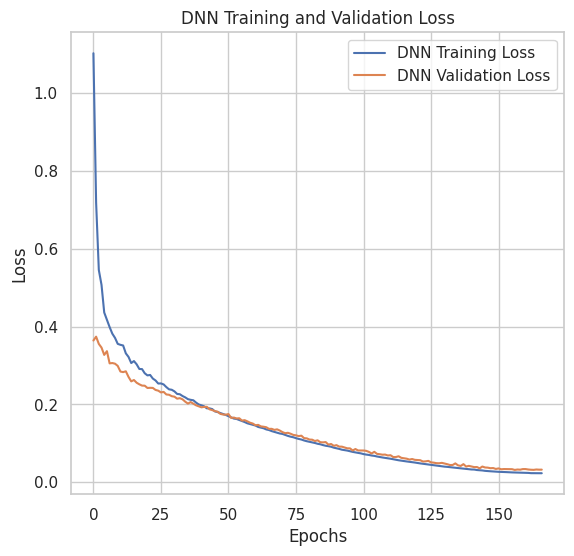

In [247]:
plt.figure(figsize=(14, 6))

# DNN Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_dnn_optimized.history['loss'], label='DNN Training Loss')
plt.plot(history_dnn_optimized.history['val_loss'], label='DNN Validation Loss')
plt.title('DNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

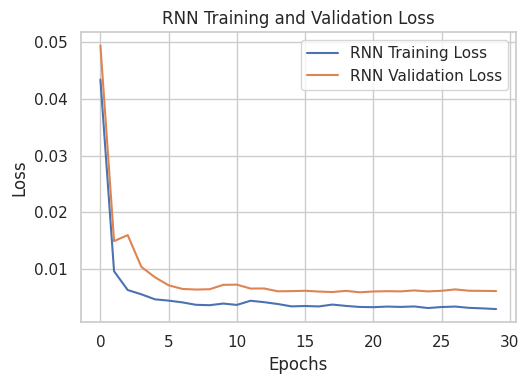

In [248]:
plt.subplot(1, 2, 2)
plt.plot(history_rnn_optimized.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn_optimized.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()